In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
from google.colab import files
!pip install gdown
import gdown

#ETL y analisis exploratorio

##ETL Dataframe 2019

#### Llamada al dataframe

Esta sección del codigo se encarga de llamar al dataframe desde el link de descarga extraido del drive. También muestra varias caracteristicas del dataframe para comprobar que se haya cargado correctamente.

In [ ]:
#Invocación del archivo csv
url_2019 = 'https://drive.google.com/uc?export=download&id=10iOfvQy79727IttWiOSxOXkcFTc9NEY2'
output_2019 = 'data_2019.csv'
gdown.download(url_2019, output_2019, quiet=False)

#Carga del archivo csv al dataframe df_2019
df_2019 = pd.read_csv(output_2019,sep=';')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=10iOfvQy79727IttWiOSxOXkcFTc9NEY2
From (redirected): https://drive.google.com/uc?export=download&id=10iOfvQy79727IttWiOSxOXkcFTc9NEY2&confirm=t&uuid=4482ea5a-c379-457c-8c60-9e4164749d2c
To: /content/data_2019.csv
100%|██████████| 241M/241M [00:05<00:00, 42.1MB/s]
<ipython-input-2-e6d6b049965c>:7: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,18

In [ ]:
#Mostrar descripcion del dataframe para comprobaciones
df_2019.describe()

cod_provincia         sector         ambito       idalumno  \
count  343750.000000  343750.000000  343750.000000  343750.000000   
mean       31.479959       1.382345       1.087953      51.739991   
std        30.151272       0.485961       0.283228     195.380806   
min         2.000000       1.000000       1.000000       1.000000   
25%         6.000000       1.000000       1.000000       5.000000   
50%        14.000000       1.000000       1.000000      10.000000   
75%        54.000000       2.000000       1.000000      17.000000   
max        94.000000       2.000000       2.000000     999.000000   

             isocioa  iinfraestructura  
count  343750.000000     343750.000000  
mean        1.859325         -0.770496  
std         0.921982         14.965478  
min        -1.000000        -99.000000  
25%         2.000000          1.000000  
50%         2.000000          2.000000  
75%         2.000000          2.000000  
max         3.000000          3.000000

In [ ]:
#Mostrar la cantidad de columnas del dataframe para comprobaciones
num_cols_2019 = len(df_2019.columns)

print(f"El DataFrame df_2019 tiene {num_cols_2019} columnas.")

El DataFrame df_2019 tiene 264 columnas.


In [ ]:
#Mostrar las columnas del dataframe para comprobaciones
print("\nColumnas de df_2019:")
print(df_2019.columns)


Columnas de df_2019:
Index(['ID1', 'cod_provincia', 'sector', 'ambito', 'seccion', 'idalumno',
       'mes_nacimiento', 'año_nacimiento', 'sexo', 'nacionalidad_alumno',
       ...
       'trabaja_fuera_hogar_remunerado', 'migración', 'edadA_junio2019',
       'sobreedad', 'infraestructura', 'iinfraestructura', 'ap42_01rec',
       'ap42_02rec', 'ap42_03rec', 'ap42_04rec'],
      dtype='object', length=264)


#### Eliminación de columnas innecesarias y conversion a formato numerico

A continuación se eliminan todas las columnas del dataframe definidas como innecesarias para el análisis.

In [ ]:
columns_to_remove = ["tiene_smart_TV", "tiene_microondas", "tiene_aire_acondicionado", "familia_estudiante_universitario", \
                     "familia_graduado_universitario", "cuida_hermano", "acuerdo_buena_convivencia", "acuerdo_llevarse_bien_estudiantes", \
                     "acuerdo_llevarse_bien_docentes", "acuerdo_sentirse_bien", "frecuencia_peleas", "frecuencia_ataque_a_profesores", \
                     "frecuencia_ataque_a_alumnos_rrss", "frecuencia_ataque_a_profesores_rrss", "frecuencia_daños", \
                     "acuerdo_convivencia_respetado_alumnos", "acuerdo_convivencia_respetado_docentes", "acuerdo_convivencia_se_tomas_medidas", \
                     "acuerdo_convivencia_aula", "conflicto_tratado_otro", "escuela_orientacion_vocacionlan_carrera","escuela_orientacion_vocacionlan_carrera_asistio",\
                     "escuela_informacion_carreras_1","escuela_informacion_carreras_1_asistio",\
                     "escuela_informacion_carreras_2","escuela_informacion_carreras_2_asistio","escuela_informacion_carreras_3",\
                     "escuela_informacion_carreras_3_asistio","pregunta_irrelevante_1","pregunta_irrelevante_2","pregunta_irrelevante_3",\
                     "pregunta_irrelevante_4","pregunta_irrelevante_5","pregunta_irrelevante_6","pregunta_irrelevante_7","pregunta_irrelevante_8",\
                     "pregunta_irrelevante_9","pregunta_irrelevante_10","pregunta_irrelevante_11","alumno_hacer_despues_secundario",\
                     "pregunta_irrelevante_12","pregunta_irrelevante_13","pregunta_irrelevante_14", "pregunta_irrelevante_15", \
                     "pregunta_irrelevante_16", "pregunta_irrelevante_17", "pregunta_irrelevante_18", "pregunta_irrelevante_19",\
                     "pregunta_irrelevante_20", "pregunta_irrelevante_21", "pregunta_irrelevante_22", "pregunta_irrelevante_23",\
                     "pregunta_irrelevante_24", "pregunta_irrelevante_25", "pregunta_irrelevante_26", "pregunta_irrelevante_27", \
                     "pregunta_irrelevante_28", "pregunta_irrelevante_29", "pregunta_irrelevante_30", "pregunta_irrelevante_31",\
                     "pregunta_irrelevante_32", "pregunta_irrelevante_33", "pregunta_irrelevante_34", "pregunta_irrelevante_35",\
                     "pregunta_irrelevante_36", "pregunta_irrelevante_37", "pregunta_irrelevante_38", "pregunta_irrelevante_39", \
                     "pregunta_irrelevante_40", "pregunta_irrelevante_41", "pregunta_irrelevante_42", "pregunta_irrelevante_43", \
                     "pregunta_irrelevante_44", "pregunta_irrelevante_45", "pregunta_irrelevante_46", "pregunta_irrelevante_47", \
                     "pregunta_irrelevante_48", "pregunta_irrelevante_49", "pregunta_irrelevante_50", "habilidad_comprender_texto", \
                     "habilidad_escribir_texto", "habilidad_expocicion_oral", "habilidad_resolver_ejercicios", "acuerdo_disfruta_matematica", \
                     "acuerdo_interesa_matematica", "acuerdo_esfuerzo_matematica", "acuerdo_proponer_bien_matematica", \
                     "acuerdo_matematica_importante", "acuerdo_aprendi_mucho_matematica", "acuerdo_investigar_redactar_informe", \
                     "acuerdo_tomar_apuntos", "acuerdo_porcision_propia", "acuerdo_resolver_situaciones", "acuerdo_presentaciones_orales", \
                     "acuerdo_identificar_dificultad_aprendizaje", "acuerdo_expresar_ideas", "acuerdo_escuchar_demas", \
                     "acuerdo_analizar_consecuencias_acciones", "acuerdo_asumir_compromiso", "acuerdo_trabajo_grupo", \
                     "escuela_proporciona_clases_apoyo", "escuela_seguimiento_personalizado", "escuela_adapta_clases", \
                     "escuela_diferentes_formas_evaluar", "enseñar_sobre_desarrollo_sustentable", "enseñar_sobre_oferta_educativa", \
                     "enseñar_sobre_otros", "frecuencia_uso_computadora", "frecuencia_uso_notebook", "frecuencia_uso_tablet", \
                     "frecuencia_uso_carro_digital", "frecuencia_uso_celular", "usa_celular_aula", "uso_internet_como_buscar", \
                     "uso_internet_como_cuidar_datos", "uso_internet_como_funciona_busqueda", "uso_internet_como_citar", \
                     "uso_internet_identificar_proposito", "uso_compu_clase_escribir", "uso_compu_clase_leer", "uso_compu_clase_cuestionarios", \
                     "uso_compu_clase_buscar_informacion", "uso_compu_clase_simulaciones", "uso_compu_clase_animaciones", \
                     "uso_compu_clase_multimedia", "uso_compu_clase_juegos", "uso_compu_clase_programar_1", "uso_compu_clase_robots", \
                     "uso_compu_clase_excel", "uso_compu_clase_programar_2", "uso_compu_materia_lengua", "uso_compu_materia_historia", \
                     "uso_compu_materia_matematica", "uso_compu_materia_plastica", "uso_compu_materia_quimica_fisica", "uso_compu_materia_biologia", \
                     "uso_compu_materia_informatica", "uso_compu_materia_otros", "uso_compu_materia_ninguna", "edad_uso_compu_1", "edad_uso_compu_2", \
                     "dispositivo_buscar_informacion", "dispositivo_estudiar", "dispositivo_tareas_grupo", "dispositivo_tareas_multimedia", \
                     "dispositivo_videos_temas_escuela", "frecuencia_chatear", "frecuencia_buscar_informacion_internet", "frecuencia_hacer_multimedia",\
                     "frecuencia_ver_pelicula", "frecuencia_rrss", "frecuencia_leer_mails", "frecuencia_participar_foro", "frecuencia_aprender_idioma",\
                     "frecuencia_leer_noticias", "frecuencia_jugar", "ponder", "lpondera", "mpondera", "ldesemp", "mdesemp",\
                     "modelo", "isocioa_puntaje", "isocioa", "isocioal_puntaje", "isocioal", "isocioam_puntaje", "isocioam", "repitencia_dicotomica",\
                     "jardín", "ap37_dicotomica", "ap29_01.dico", "ap29_02.dico", "ap29_03.dico", "ap29_04.dico", "ap29_05.dico", "ap29_06.dico",\
                     "ap29_07.dico", "ap26_rec", "trabaja_fuera_hogar", "trabaja_fuera_hogar_remunerado", "migración", "edadA_junio2019", "sobreedad",\
                     "infraestructura", "iinfraestructura", "ap42_01rec", "ap42_02rec", "ap42_03rec", "ap42_04rec", "escuela_proporciona_clases_"]

df_2019 = df_2019.drop(columns=columns_to_remove, errors='ignore')

Aquí se convierten a todas las columnas en formato numérico

In [ ]:

for column in df_2019.columns:
  try:
    #df_2019[column] = pd.to_numeric(df_2019[column], errors='coerce')
    df_2019[column] = pd.to_numeric(df_2019[column].str.replace(',', '.'), errors='coerce')
  except:
    pass

#### Cambiar la codificación de la columna nacionalidad_alumno a la del 2022

In [ ]:
#Cambiar la codificación de nacionalidad a la de 2022
df_2019['nacionalidad_alumno'] = df_2019['nacionalidad_alumno'].replace([5, 6, 7, 8, 9, 10, 15], [7, 8, 9, 5, 10, 14, 14])

#### Columna padres extranjeros

Crear la columna de padres_extranjeros que sea igual a 1 cuando haya al menos un padre extranjero y 0 cuando ambos padres sean Argentinos. Si se desconoce la nacionalidad de uno de los padres y el otro es extranjero pues se marca como extranjero, si es argentino pues se marca como argentino.

In [ ]:
# prompt: En las columnas nacionalidad_madre y nacionalidad_padre hacer que los valores negativos se queden como estan. Los valores mayores a 1 transformarlos en 0, y si el valor es 1 dejarlo tal cual

for column in ['nacionalidad_madre', 'nacionalidad_padre']:
  df_2019[column] = df_2019[column].apply(lambda x: x if x <= 1 else (x if x < 0 else 0))


In [ ]:
# prompt: Fusionar las columnas nacionalidad_madre y nacionalidad_padre. si ambos valores son negativos, cambiarlos a -9, sino aplicar un OR haciendo que si al menos uno es 1 que de como resultado 1. El resultado debe ir en la columna padres_extranjeros

def fusionar_nacionalidades(row):
  nacionalidad_madre = row['nacionalidad_madre']
  nacionalidad_padre = row['nacionalidad_padre']

  if nacionalidad_madre < 0 and nacionalidad_padre < 0:
    return -9
  elif nacionalidad_madre == 1 or nacionalidad_padre == 1:
    return 1
  else:
    return 0

df_2019['padres_extranjeros'] = df_2019.apply(fusionar_nacionalidades, axis=1)
df_2019 = df_2019.drop(['nacionalidad_madre', 'nacionalidad_padre'], axis=1)


#### Columna personas_en_casa

Hacer que la columna personas_en_casa marque cuantas personas viven en la casa -1 si vive solo-

In [ ]:
# Crear una nueva columna 'personas_en_hogar' con valores 0 inicialmente
df_2019['personas_en_hogar'] = 0

# Asignar 1 a la columna 'personas_en_hogar' si vive_solo es 1
df_2019.loc[df_2019['vive_solo'] == 1, 'personas_en_hogar'] = 1

# Asignar el valor de (personas_en_casa + 1) a la columna 'personas_en_hogar' si vive_solo es 0
df_2019.loc[df_2019['vive_solo'] != 1, 'personas_en_hogar'] = df_2019['personas_en_casa'] + 1

print(df_2019[['personas_en_casa','vive_solo', 'personas_en_casa']].head(10))

# Eliminar las columnas originales 'vive_solo' y 'personas_en_casa' (opcional)
df_2019 = df_2019.drop(['vive_solo', 'personas_en_casa'], axis=1)

#Renombrar la columna
df_2019 = df_2019.rename(columns={'personas_en_hogar': 'personas_en_casa'})

# Mostrar las primeras filas del DataFrame para verificar la fusión
print(df_2019[['personas_en_casa']].head(10))

   personas_en_casa  vive_solo  personas_en_casa
0               3.0        2.0               3.0
1               3.0        2.0               3.0
2               3.0        2.0               3.0
3               2.0        2.0               2.0
4               2.0        2.0               2.0
5               3.0        2.0               3.0
6               3.0        2.0               3.0
7               1.0        2.0               1.0
8               2.0        2.0               2.0
9               3.0        2.0               3.0
   personas_en_casa
0               4.0
1               4.0
2               4.0
3               3.0
4               3.0
5               4.0
6               4.0
7               2.0
8               3.0
9               4.0


#### Columnas vive_madre, vive_padre, vive_hermano, vive_hijo, vive_tio, vive_abuelo, vive_pareja, vive_amigos, vive_otro

Cambiar los valores de su grupo conviviente a la codificación binaria 1=si; 0=no

In [ ]:
# prompt: En las columnas vive_madre, vive_padre, vive_hermano, vive_hijo, vive_tio, vive_abuelo, vive_pareja, vive_amigos, vive_otro; cambiar los valores -9 por 0

columns_to_replace = ['vive_madre', 'vive_padre', 'vive_hermano', 'vive_hijo', 'vive_tio', 'vive_abuelo', 'vive_pareja', 'vive_amigos', 'vive_otro']

for column in columns_to_replace:
  df_2019[column] = df_2019[column].replace(-9, 0)

###Columna tiene_hijos

In [ ]:
# prompt: en la columna tiene_hijos cambiar los 2 por 0

df_2019['tiene_hijos'] = df_2019['tiene_hijos'].replace(2, 0)


#### Columnas tiene_auto, tiene_baño, tiene_computadora y tiene_tablet

Cambiar los valores de la columna "tiene_auto", "tiene_baño", "tiene_computadora" y "tiene_tablet" por valores binarios 1=si; 0=no

In [ ]:
# prompt: En las columnas tiene_auto, tiene_baño, tiene_computadora y tiene_tablet restales 1 a los valores mayores a 0. Luego a todos los valores mayores a 0 transformarlos en 1

columns_to_transform = ['tiene_auto', 'tiene_baño', 'tiene_computadora', 'tiene_tablet']

for column in columns_to_transform:
  df_2019[column] = df_2019[column].apply(lambda x: x - 1 if x > 0 else x)
  df_2019[column] = df_2019[column].apply(lambda x: 1 if x > 0 else x)


In [ ]:
# prompt: en la columna tiene_internet cambiar los 2 por 0

df_2019['tiene_internet'] = df_2019['tiene_internet'].replace(2, 0)


###Columnas celular_propio y celular_propio_internet

In [ ]:
# prompt: remplazar en las columnas celular_propio y celular_propio_internet los 2 por 0. Luego en la columna celular_propio_internet si el valor es mayor a 2 pasarlo a -9

df_2019['celular_propio'] = df_2019['celular_propio'].replace(2, 0)
df_2019['celular_propio_internet'] = df_2019['celular_propio_internet'].replace(2, 0)
df_2019.loc[df_2019['celular_propio_internet'] > 2, 'celular_propio_internet'] = -9


#### Columnas nivel_educativo_madre y nivel_educativo_padre

Cambiar la codificación de las columnas nivel_educativo_madre y nivel_educativo_padre a la codificación de 2022

In [ ]:
# Crear un diccionario de mapeo para la transformación de valores
mapping = {2: 1, 3: 1, 4: 2, 5: 3, 6: 3, 7: 3, 1: 4, 8: 4}

# Aplicar el mapeo a las columnas 'nivel_educativo_madre' y 'nivel_educativo_padre'
df_2019['nivel_educativo_madre'] = df_2019['nivel_educativo_madre'].map(mapping)
df_2019['nivel_educativo_padre'] = df_2019['nivel_educativo_padre'].map(mapping)

In [ ]:
# prompt: en las columnas nivel_educativo_padre y nivel_educativo_madre cambiar los 4 por 0

# Reemplazar los valores 4 por 0 en las columnas 'nivel_educativo_padre' y 'nivel_educativo_madre'
df_2019['nivel_educativo_padre'] = df_2019['nivel_educativo_padre'].replace(4, 0)
df_2019['nivel_educativo_madre'] = df_2019['nivel_educativo_madre'].replace(4, 0)


#### Columnas cuida_familia y realiza_tareas_hogar

Cambiar la codificación de la columna cuida_familiar y realiza_tareas_hogar *a* la de 2022

In [ ]:
# Create a mapping dictionary for the transformation
mapping = {4: 1, 1: 2, 2: 2, 3: 2}

# Apply the mapping to the 'cuida_familiar' and 'realiza_tareas_hogar' columns
df_2019['cuida_familiar'] = df_2019['cuida_familiar'].map(mapping)
df_2019['realiza_tareas_hogar'] = df_2019['realiza_tareas_hogar'].map(mapping)


#### Columnas bulling_aspecto_fisico, frecuencia_bulling_aspecto_fisico_1 y frecuencia_bulling_aspecto_fisico_2

Crear columna padres extranjeros

In [ ]:
# Crear una nueva columna 'padres_extranjeros' con valores 0 inicialmente
df_2019['bullying_aspecto_fisico'] = 0

# Asignar 1 a la columna 'padres_extranjeros' si al menos una de las columnas 'nacionalidad_madre' o 'nacionalidad_padre' es igual a 1
df_2019.loc[(df_2019['frecuencia_bullying_aspecto_fisico_1'] == 1) | (df_2019['frecuencia_bullying_aspecto_fisico_2'] == 1), 'bullying_aspecto_fisico'] = 1

print(df_2019[['bullying_aspecto_fisico', 'frecuencia_bullying_aspecto_fisico_1', 'frecuencia_bullying_aspecto_fisico_2']].head())

# Eliminar las columnas originales 'nacionalidad_madre' y 'nacionalidad_padre' (opcional)
df_2019 = df_2019.drop(['frecuencia_bullying_aspecto_fisico_1', 'frecuencia_bullying_aspecto_fisico_2'], axis=1)

# Mostrar las primeras filas del DataFrame para verificar la fusión
print(df_2019[['bullying_aspecto_fisico']].head())

   bullying_aspecto_fisico  frecuencia_bullying_aspecto_fisico_1  \
0                        0                                   2.0   
1                        0                                   2.0   
2                        1                                   1.0   
3                        0                                   2.0   
4                        1                                   1.0   

   frecuencia_bullying_aspecto_fisico_2  
0                                   2.0  
1                                   2.0  
2                                   1.0  
3                                   2.0  
4                                   1.0  
   bullying_aspecto_fisico
0                        0
1                        0
2                        1
3                        0
4                        1


#### Columnas año_nacimiento, mes_nacimiento y edad

Crear columna edad con edad calculada a la fecha del examen

In [ ]:
# prompt: En la columna año_nacimiento, cambiar 1 por 1998, 2 por 1999, 3 por 2000, 4 por 2001, 5 por 2002, 6 por 2003 y el resto por null

def convert_year(year):
  if year == 1:
    return 1998
  elif year == 2:
    return 1999
  elif year == 3:
    return 2000
  elif year == 4:
    return 2001
  elif year == 5:
    return 2002
  elif year == 6:
    return 2003
  else:
    return None

df_2019['año_nacimiento'] = df_2019['año_nacimiento'].apply(convert_year)


In [ ]:
# Crear una función para calcular la edad
def calcular_edad(row):
  try:
    fecha_nacimiento = datetime(int(row['año_nacimiento']), int(row['mes_nacimiento']), 1)
    fecha_referencia = datetime(2019, 9, 1)
    edad = (fecha_referencia - fecha_nacimiento).days // 365
    return edad
  except (ValueError, TypeError):
    return None

# Aplicar la función a cada fila del DataFrame para calcular la edad y crear una nueva columna
df_2019['edad'] = df_2019.apply(calcular_edad, axis=1)

print(df_2019[['mes_nacimiento', 'año_nacimiento', 'edad']].head())

# Eliminar las columnas 'mes_nacimiento' y 'año_nacimiento'
df_2019 = df_2019.drop(['mes_nacimiento', 'año_nacimiento'], axis=1)

# Mostrar las primeras filas del DataFrame con la nueva columna 'edad'
print(df_2019[['edad']].head())

   mes_nacimiento  año_nacimiento  edad
0            10.0          2001.0  17.0
1             7.0          2001.0  18.0
2             3.0          2002.0  17.0
3            11.0          2001.0  17.0
4            11.0          2001.0  17.0
   edad
0  17.0
1  18.0
2  17.0
3  17.0
4  17.0


#### Columnas ayuda_trabajo_padres, dias_trabajo_fuera_casa, trabaja_remunerado, fuera_escuela_junto_amigos, fuera_escuela_idioma, fuera_escuela_leer, fuera_escuela_deporte, fuera_escuela_clases_artes, fuera_escuela_television,

Cambiar las columnas dias_trabajo_fuera_casa, fuera_escuela_junto_amigos, fuera_escuela_idioma, fuera_escuela_leer, fuera_escuela_deporte, fuera_escuela_clases_artes, fuera_escuela_television,
a formato 1=sí, 2=no

In [ ]:
# prompt: remplazar en la columna ayuda_trabajo_padres los 2 por 0

df_2019['ayuda_trabajo_padres'] = df_2019['ayuda_trabajo_padres'].replace(2, 0)
df_2019['trabaja_remunerado'] = df_2019['trabaja_remunerado'].replace(2, 0)


In [ ]:
columns_to_replace = [ 'dias_trabajo_fuera_casa', 'fuera_escuela_junto_amigos', 'fuera_escuela_idioma', 'fuera_escuela_leer', 'fuera_escuela_deporte', 'fuera_escuela_clases_artes', 'fuera_escuela_television']

for column in columns_to_replace:
 df_2019[column] = df_2019[column].replace(1, 0)
 df_2019[column] = df_2019[column].replace(2, 1)
 df_2019[column] = df_2019[column].replace(3, 1)
 df_2019[column] = df_2019[column].replace(4, 1)
 df_2019[column] = df_2019[column].replace(5, 1)
 df_2019[column] = df_2019[column].replace(6, 1)


In [ ]:
# prompt: Necesito que en las columnas dias_trabajo_fuera_casa y trabaja_remunerado se cambien los valores de -9 a 0 en funcion del resultado de un numero aleatorio

# Iterar sobre las columnas 'dias_trabajo_fuera_casa' y 'trabaja_remunerado'
for column in ['dias_trabajo_fuera_casa', 'trabaja_remunerado']:
  # Iterar sobre los índices del DataFrame
  for index, row in df_2019.iterrows():
    # Si el valor de la columna es -9
    if row[column] == -9:
      # Generar un número aleatorio entre 0 y 1
      random_number = random.random()

      # Si el número aleatorio es menor que 0.5, reemplazar -9 con 0
      if random_number < 0.9:
        df_2019.loc[index, column] = 0


Columnas asistio_jardir, repitio_primaria, repitio_secundaria_1, repitio_secundaria_2

In [ ]:
# prompt: en la columna asistio_jardin cambiar los 4 por 0

df_2019['asistio_jardin'] = df_2019['asistio_jardin'].replace(4, 0)


In [ ]:
# prompt: en las columnas repitio_primaria, repitio_secundaria_1, repitio_secundaria_2 restarles 1 a cada fila si el valor es menor a 3

columns_to_modify = ['repitio_primaria', 'repitio_secundaria_1', 'repitio_secundaria_2']

for column in columns_to_modify:
  df_2019.loc[df_2019[column] < 3, column] = df_2019.loc[df_2019[column] < 3, column] -1


#### Columnas conflicto_trado_adultos, conflicto_tratado_involucrados, conflicto_tratado_equipo_orientacion, conflicto_tratado_dejarlo_pasar, conflicto_tratado_sanciones


Aquí se cambia la notación de las columnas conflicto_trado_adultos, conflicto_tratado_involucrados, conflicto_tratado_equipo_orientacion, conflicto_tratado_dejarlo_pasar, conflicto_tratado_sanciones para que coincida con la notación del 2022

In [ ]:
columns_to_replace = ['conflicto_trado_adultos', 'conflicto_tratado_involucrados', 'conflicto_tratado_equipo_orientacion', 'conflicto_tratado_dejarlo_pasar', 'conflicto_tratado_sanciones']

for column in columns_to_replace:
  df_2019[column] = df_2019[column].replace(-9, 0)


#### Columnas motivo_faltas_enfermedad, motivo_faltas_ganas, motivo_faltas_ayuda_casa, motivo_faltas_problemas_clima, motivo_faltas_trabajo, motivo_faltas_otros

Aquí se cambia la notación de las columnas motivo_faltas_enfermedad, motivo_faltas_ganas, motivo_faltas_ayuda_casa, motivo_faltas_problemas_clima, motivo_faltas_trabajo, motivo_faltas_otros para que coincida con la notación del 2022

In [ ]:
columns_to_replace = ['motivo_faltas_enfermedad', 'motivo_faltas_ganas', 'motivo_faltas_ayuda_casa', 'motivo_faltas_problemas_clima', 'motivo_faltas_trabajo', 'motivo_faltas_otros']

for column in columns_to_replace:
  df_2019[column] = df_2019[column].replace(-9, 0)


#### Columnas enseñar_sobre_uso_tecnologias, enseñar_sobre_cambio_climatico, enseñar_sobre_salud, enseñar_sobre_conflictos_internacionales, enseñar_sobre_demanda_laboral


Aquí se cambia la notación de las columnas enseñar_sobre_uso_tecnologias, enseñar_sobre_cambio_climatico, enseñar_sobre_salud, enseñar_sobre_conflictos_internacionales, enseñar_sobre_demanda_laboral para que coincida con la notación del 2022.

In [ ]:
columns_to_replace = ['enseñar_sobre_uso_tecnologias', 'enseñar_sobre_cambio_climatico', 'enseñar_sobre_salud', 'enseñar_sobre_conflictos_internacionales', 'enseñar_sobre_demanda_laboral']

for column in columns_to_replace:
  df_2019[column] = df_2019[column].replace(-9, 2)


#### Columnas hay_acuerdo_convivencia, alumno_conoce_acuerdo_convivencia y acuerdo_convivencia_participacion_alumnos_definicion


Cambiar la codificación de las columnas alumno_conoce_acuerdo_convivencia y acuerdo_convivencia_participacion_alumnos_definicion

In [ ]:
columns_to_replace = ['alumno_conoce_acuerdo_convivencia', 'acuerdo_convivencia_participacion_alumnos_definicion']

for column in columns_to_replace:
  df_2019.loc[df_2019[column] == 1, column] = 2
  df_2019.loc[(df_2019[column] == 3) | (df_2019[column] == 4), column] = 1

In [ ]:
# prompt: en las columnas hay_acuerdo_convivencia, alumno_conoce_acuerdo_convivencia y acuerdo_convivencia_participacion_alumnos_definicion remplazar el 2 por 0

columns_to_replace = ['hay_acuerdo_convivencia', 'alumno_conoce_acuerdo_convivencia', 'acuerdo_convivencia_participacion_alumnos_definicion']

for column in columns_to_replace:
  df_2019[column] = df_2019[column].replace(2, 0)


No se puede generar un histograma para la columna ID1


<Figure size 800x600 with 0 Axes>

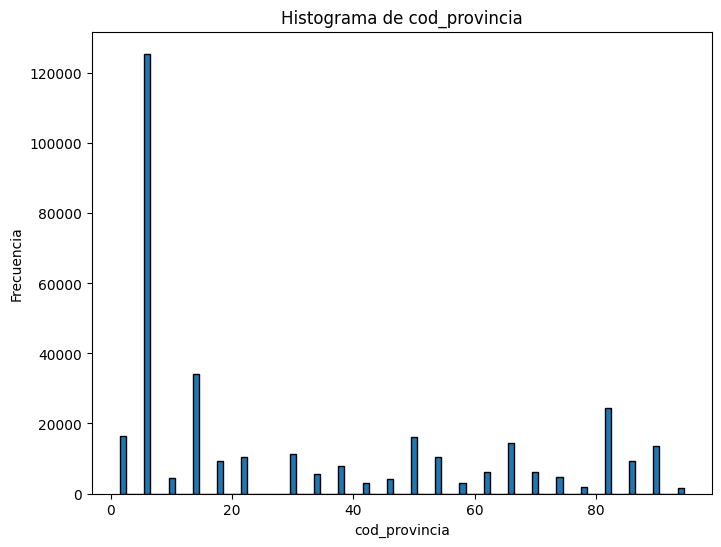

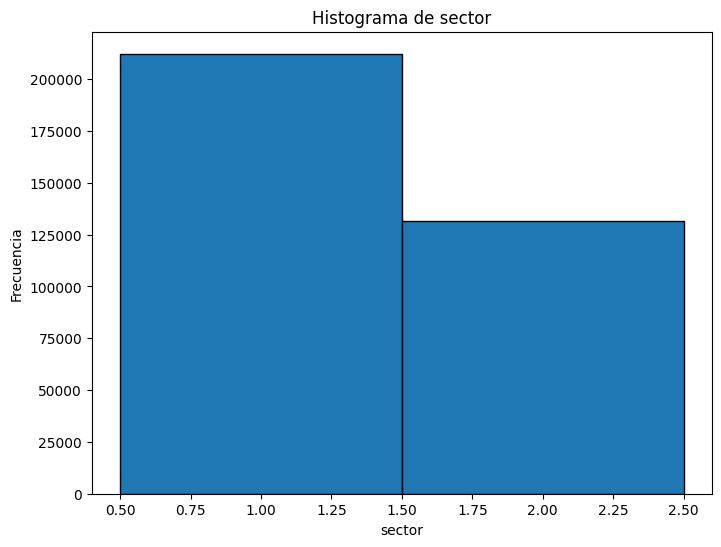

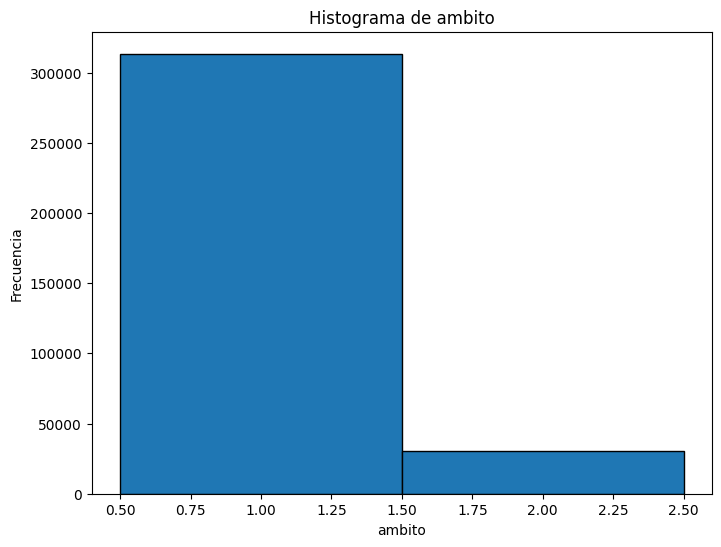

No se puede generar un histograma para la columna seccion


<Figure size 800x600 with 0 Axes>

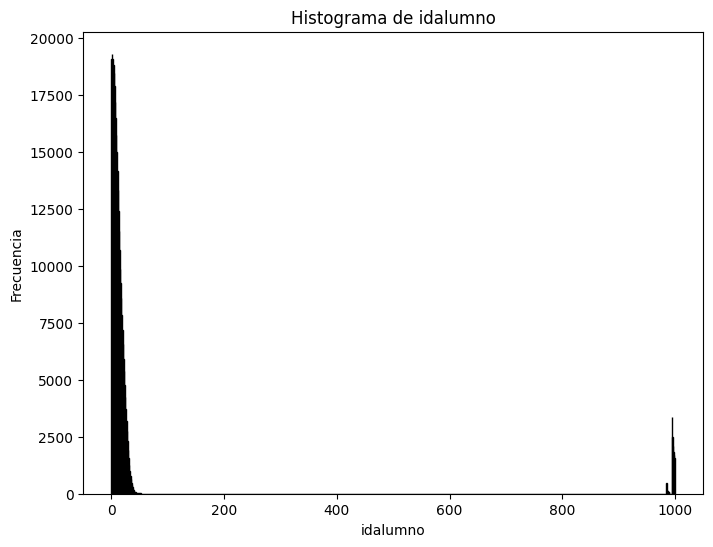

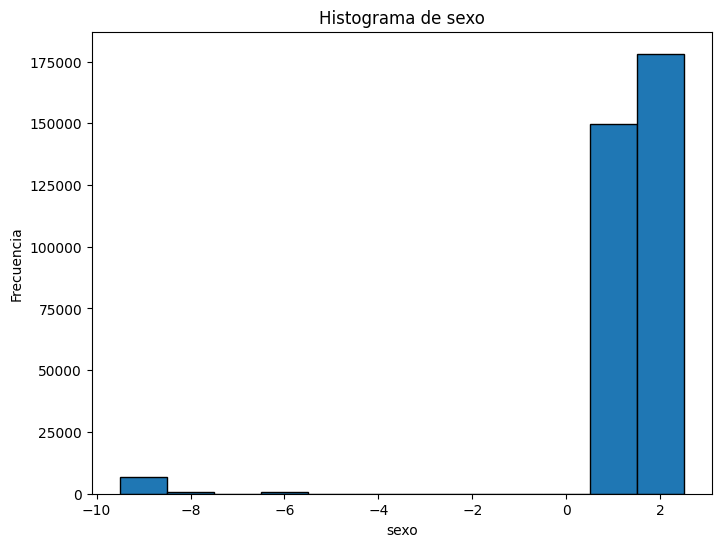

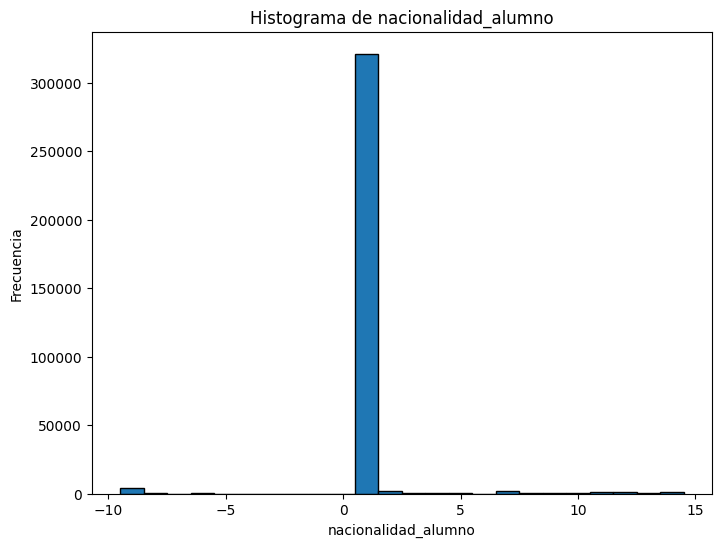

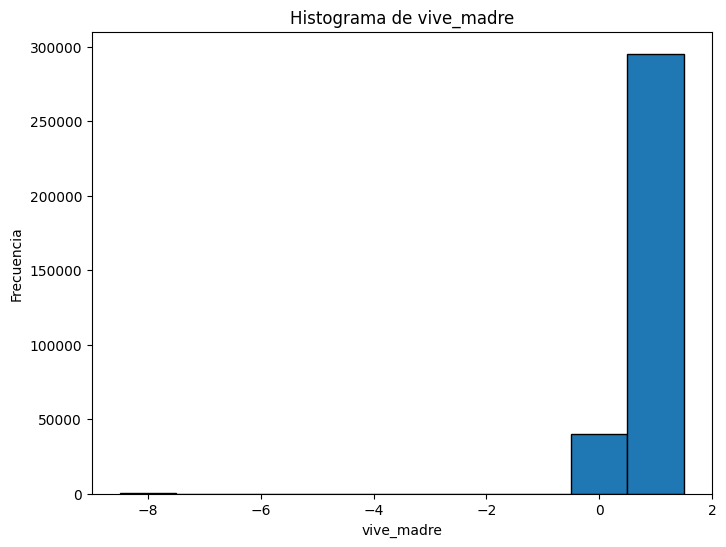

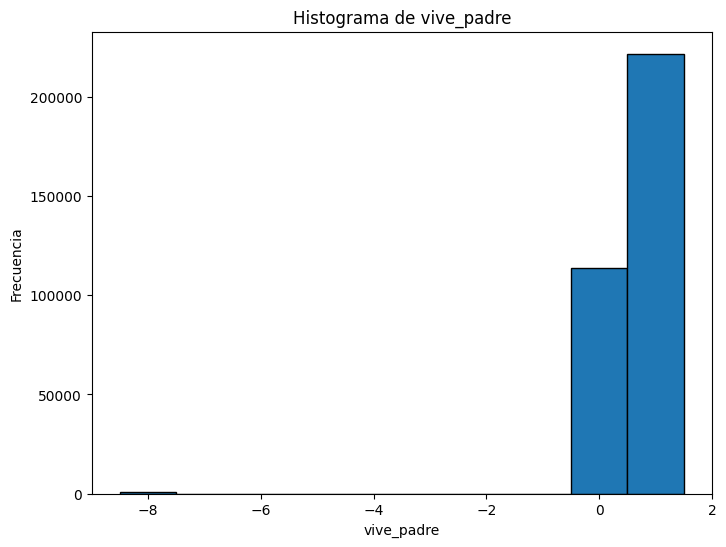

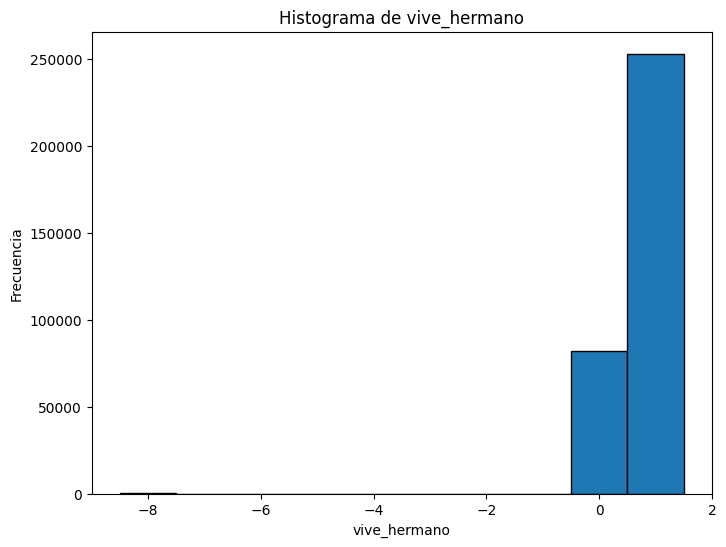

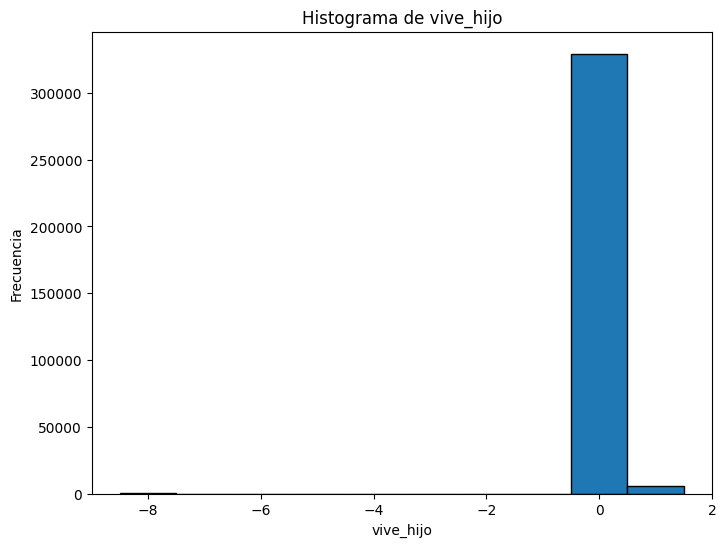

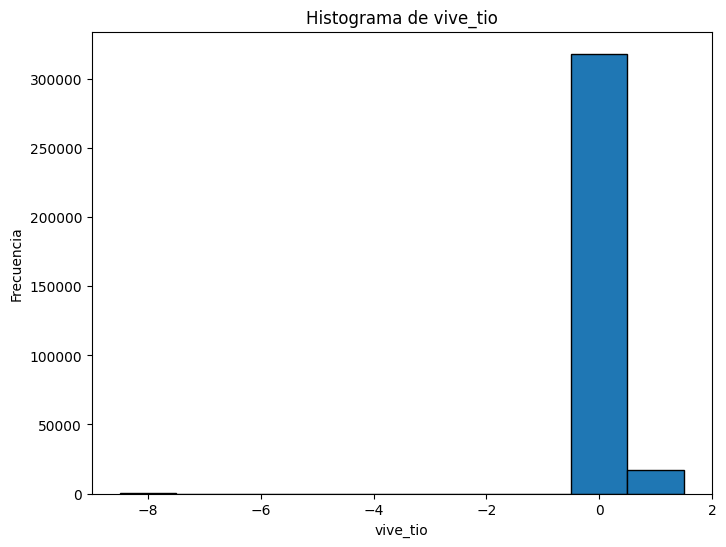

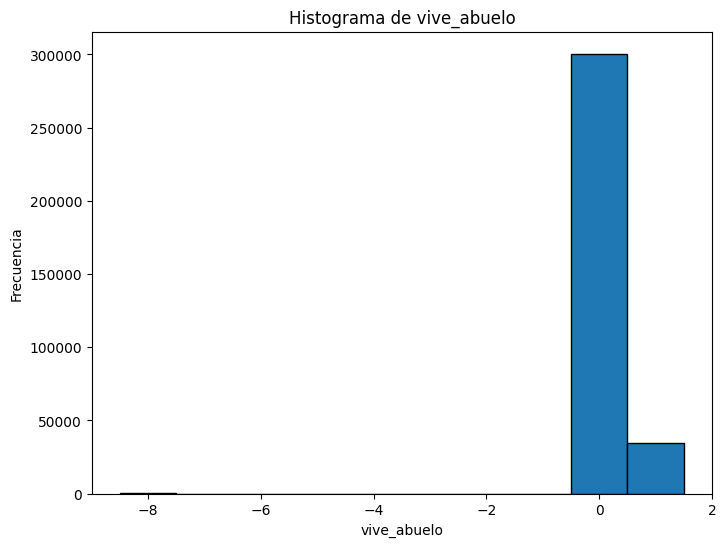

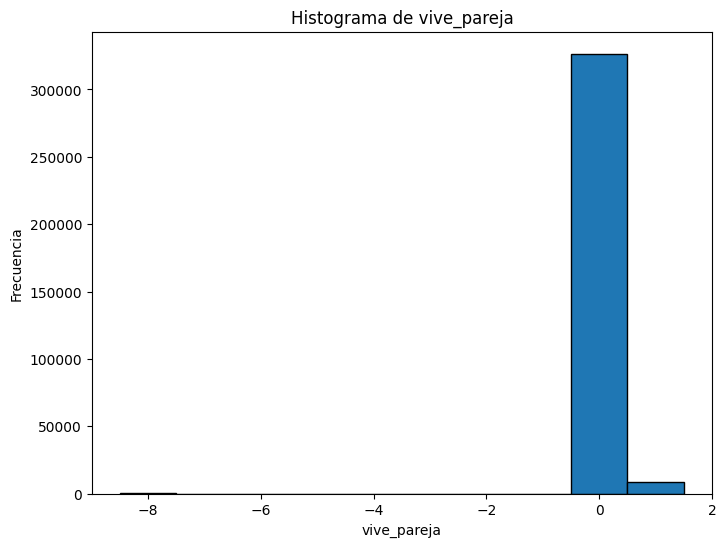

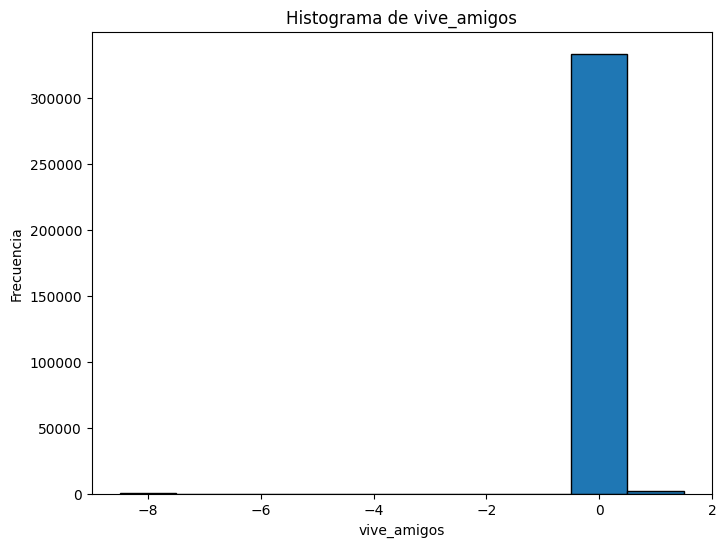

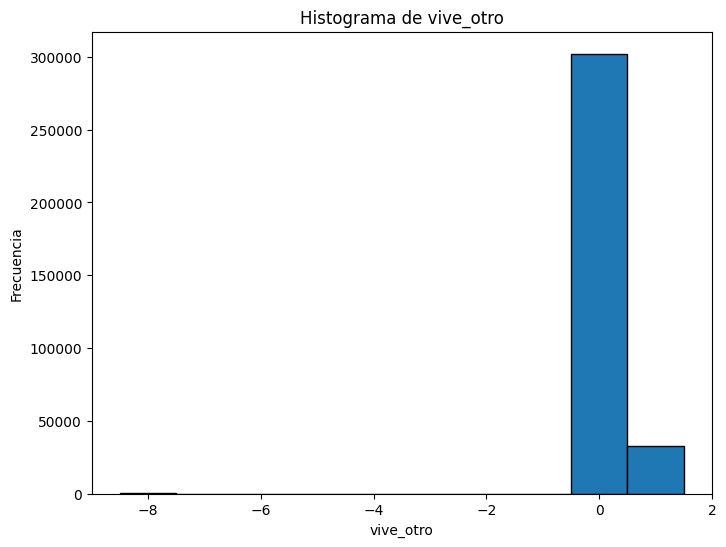

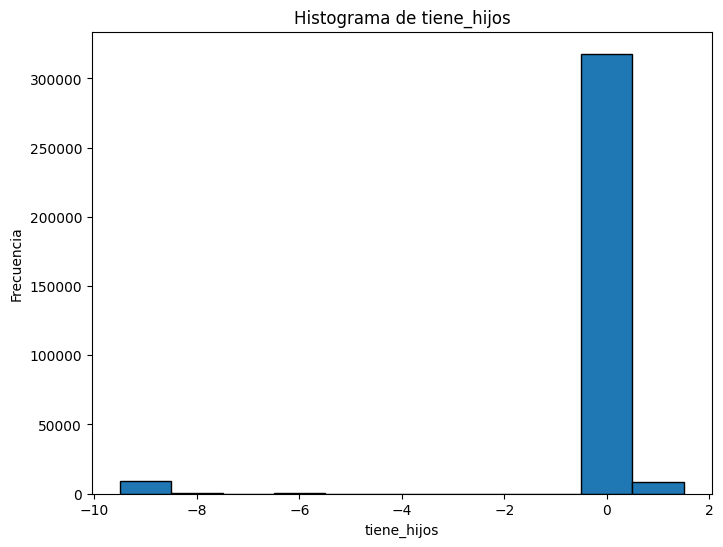

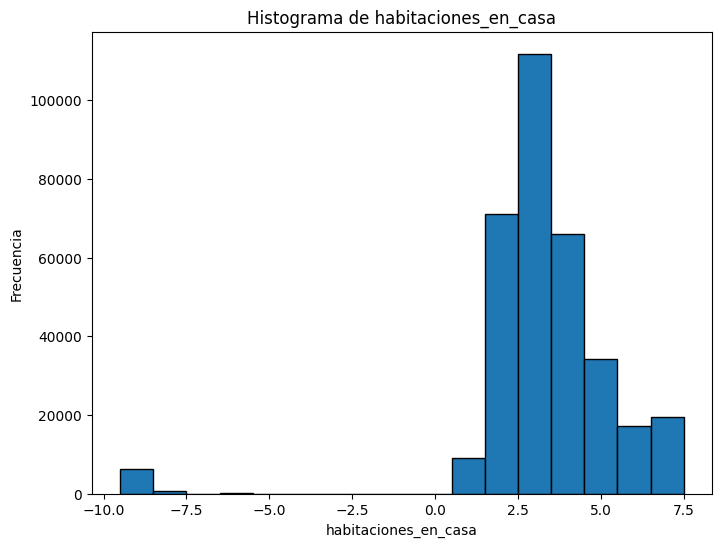

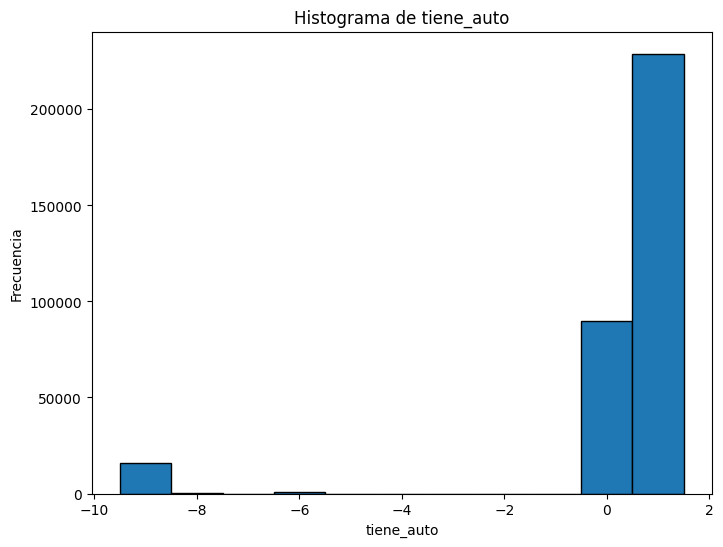

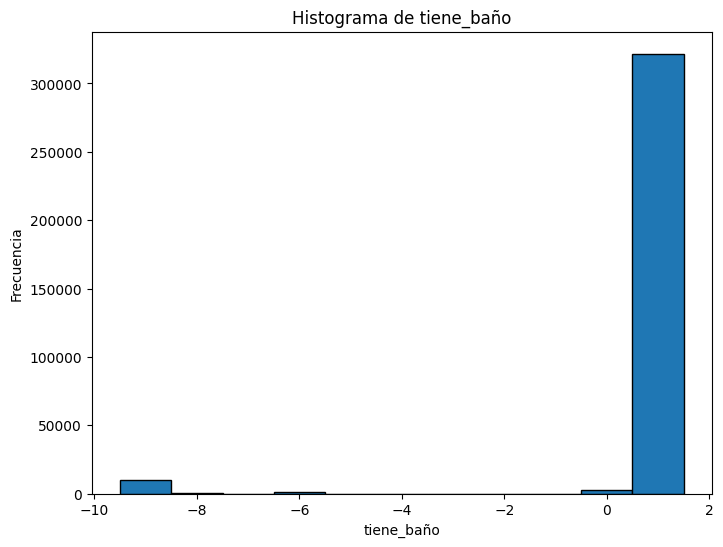

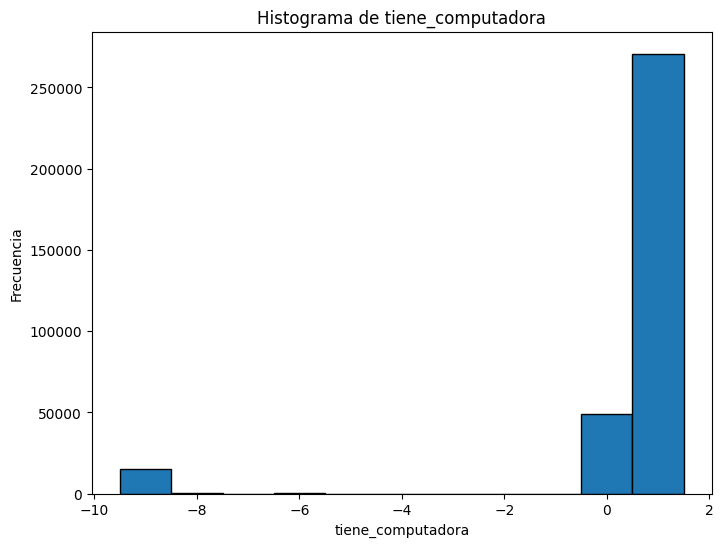

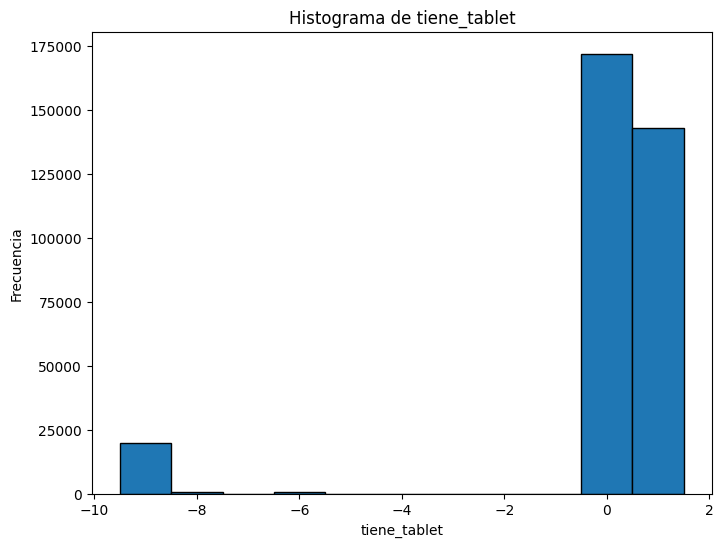

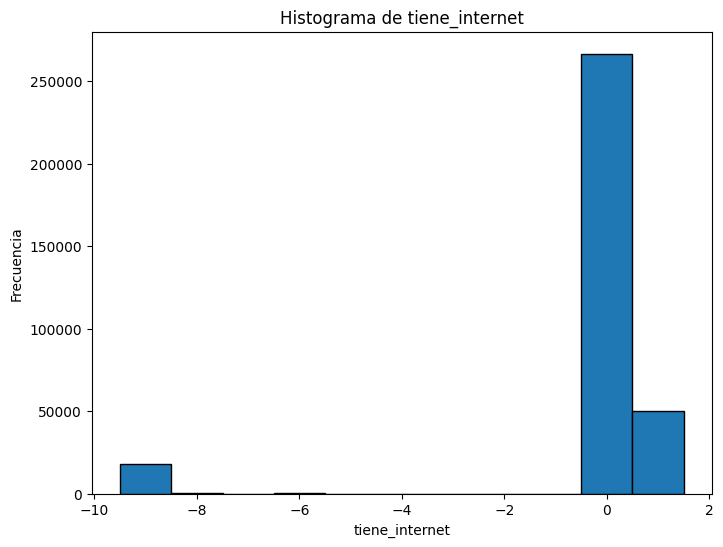

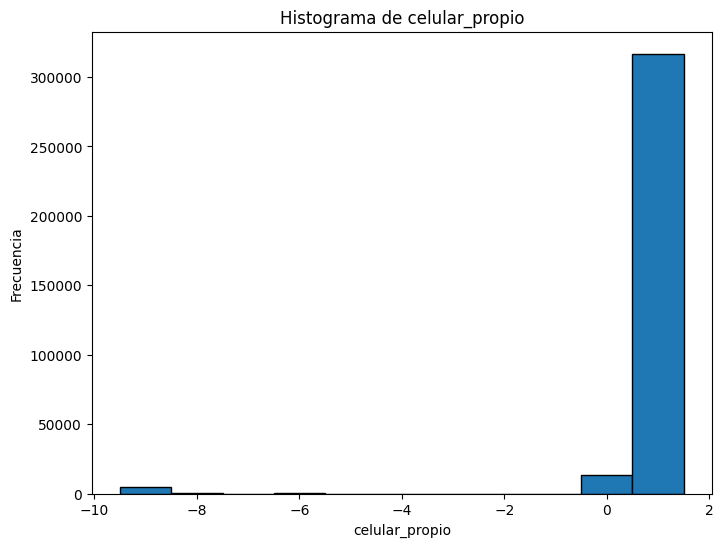

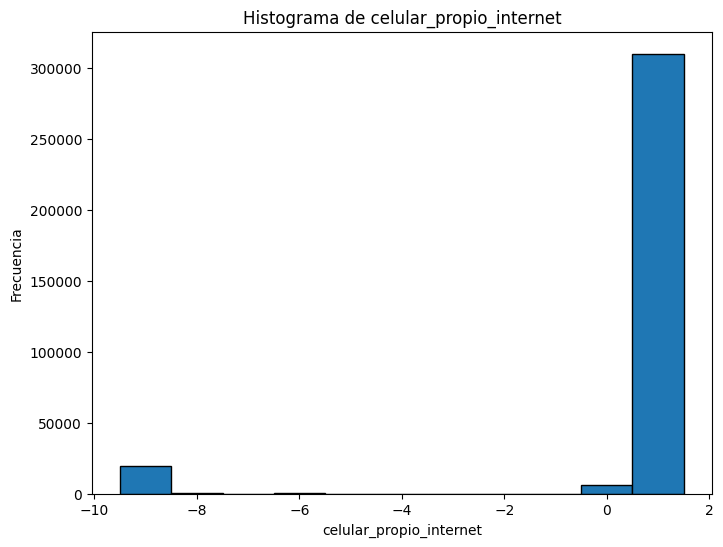

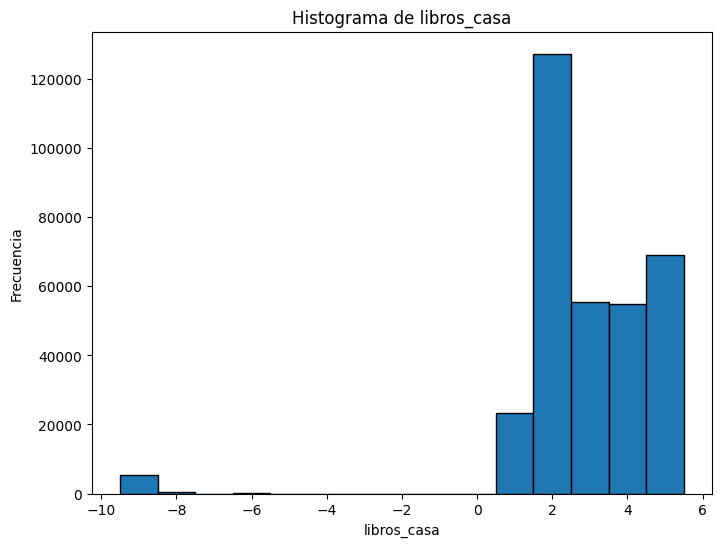

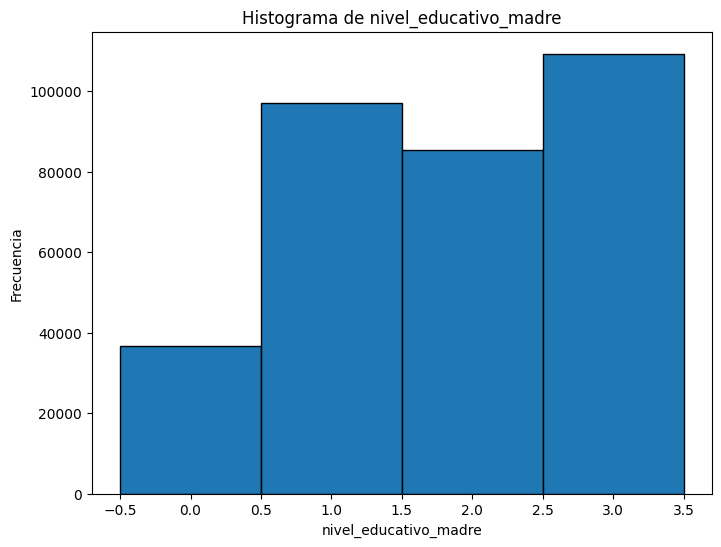

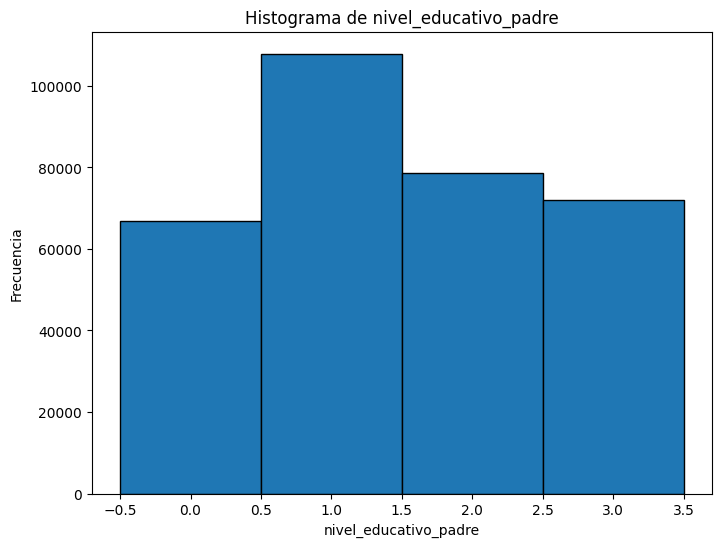

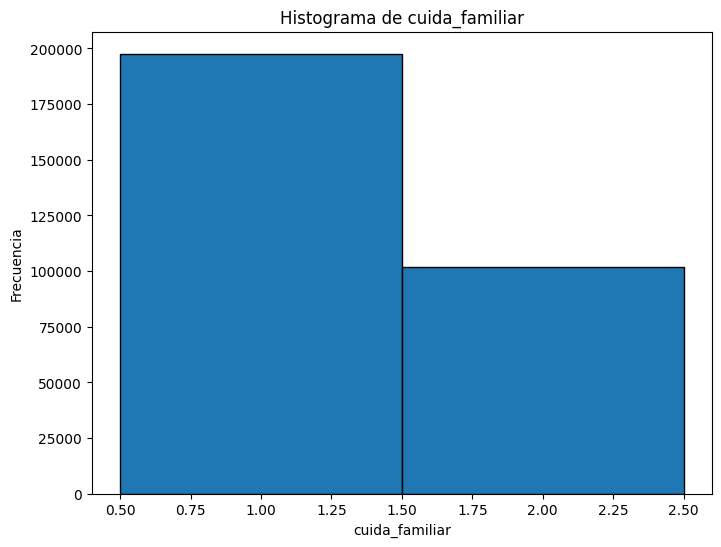

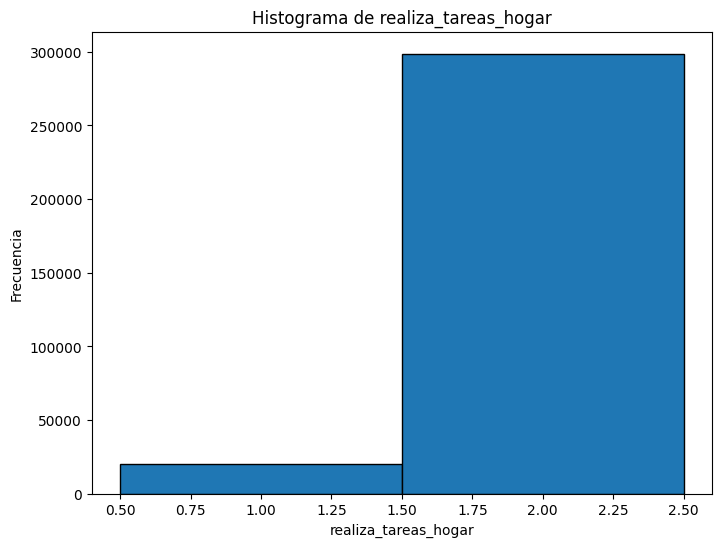

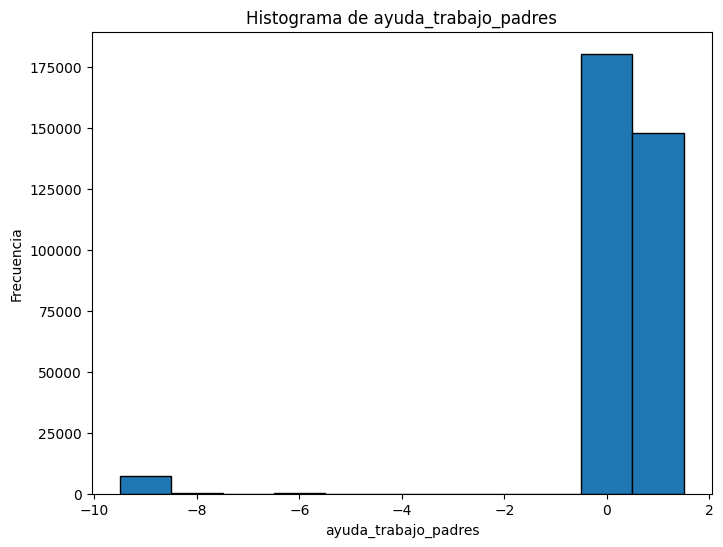

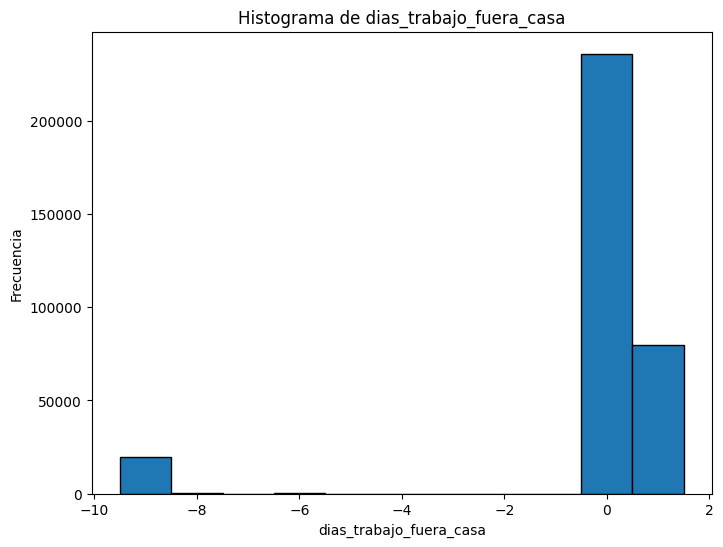

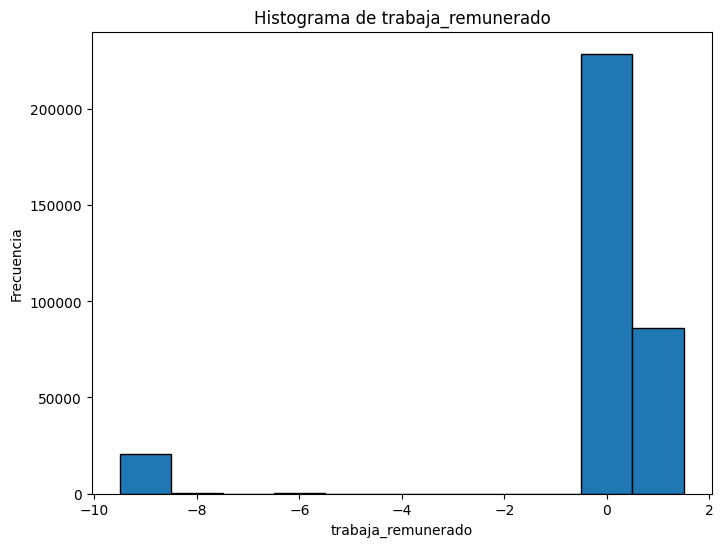

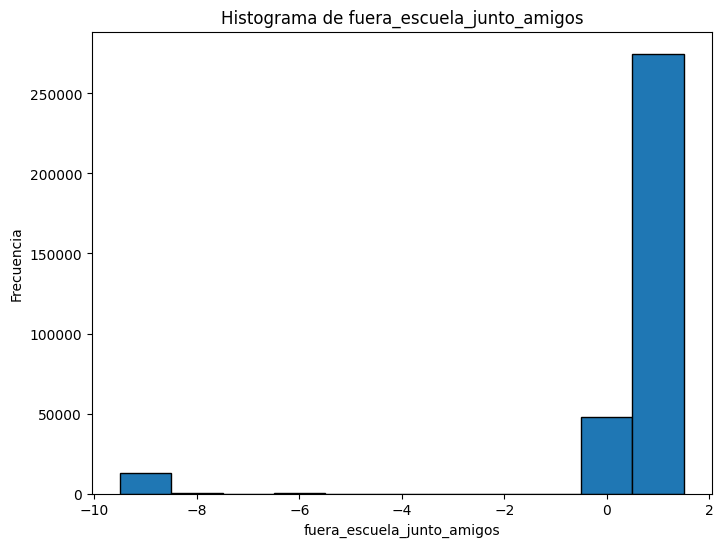

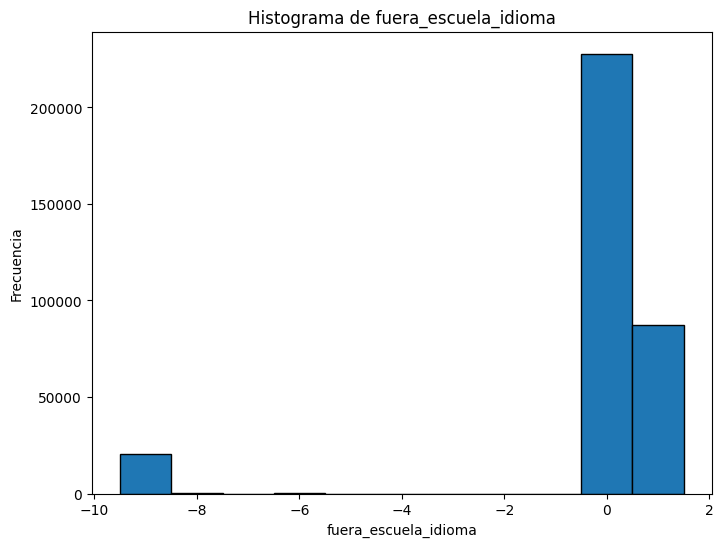

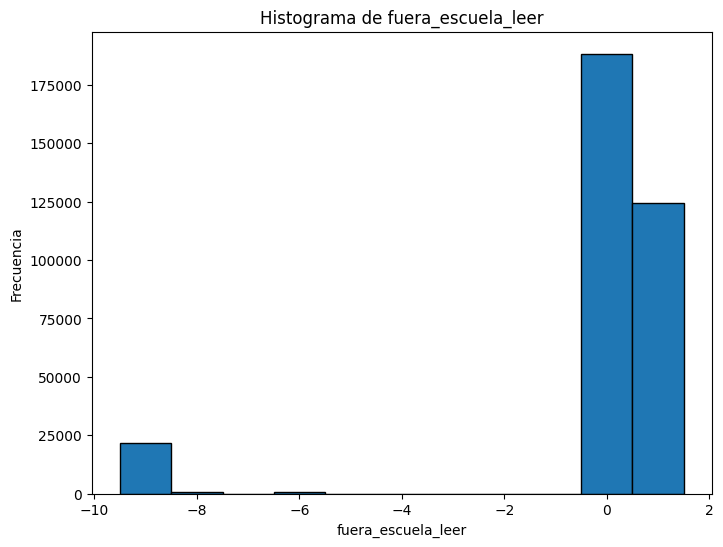

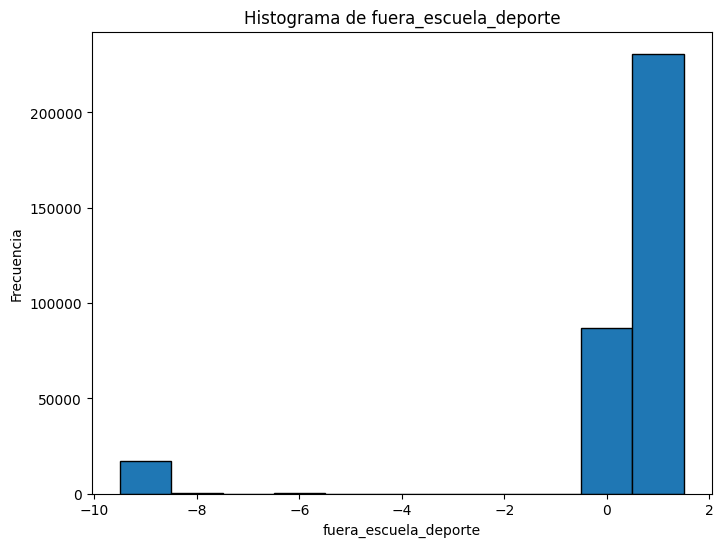

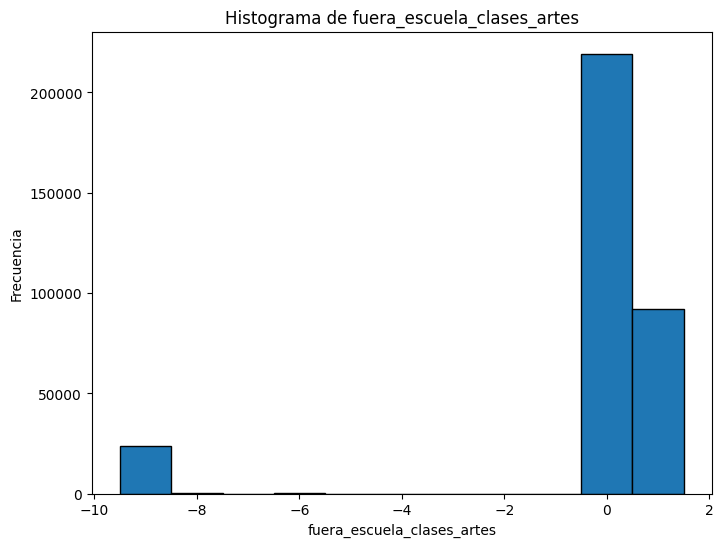

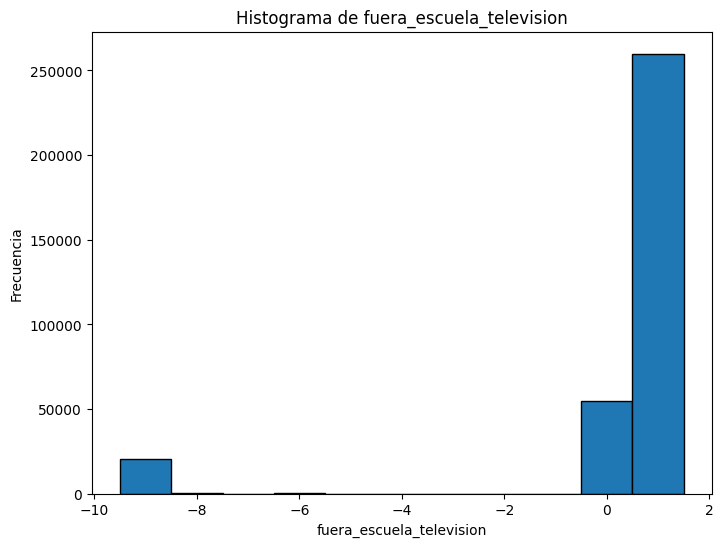

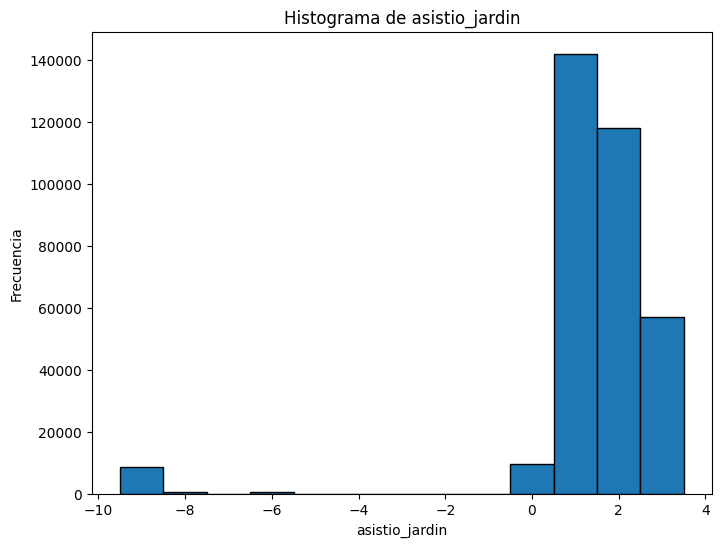

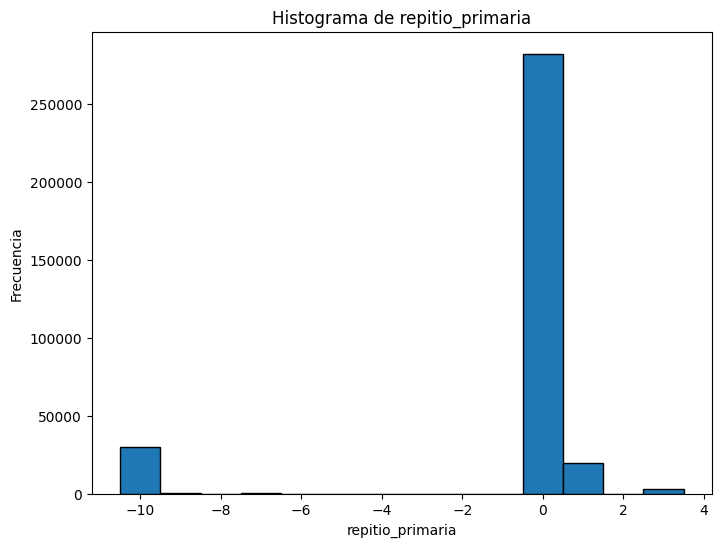

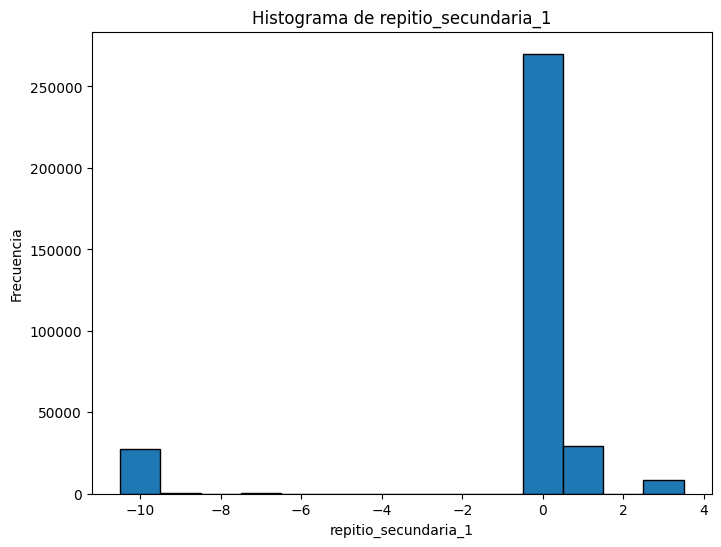

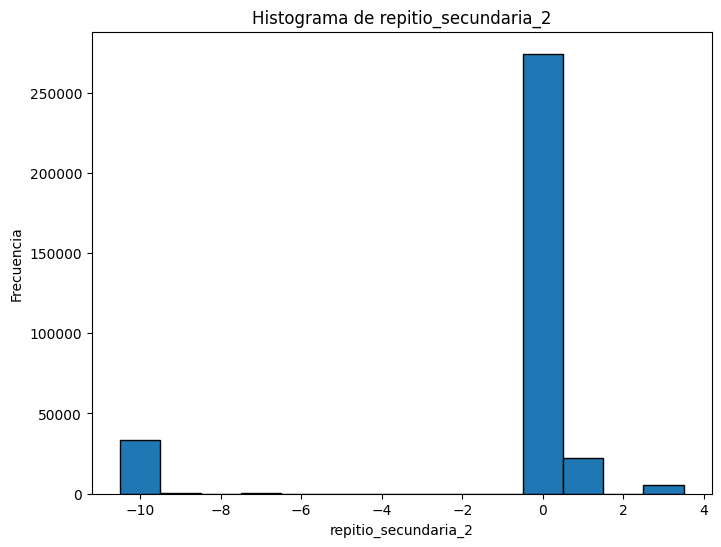

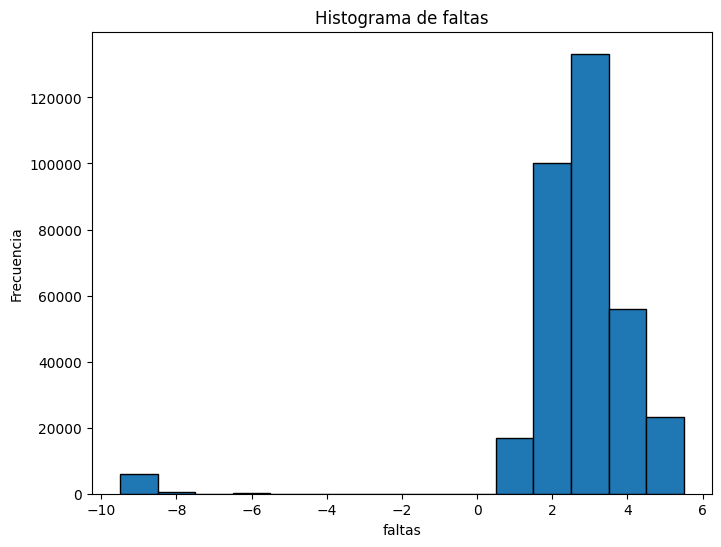

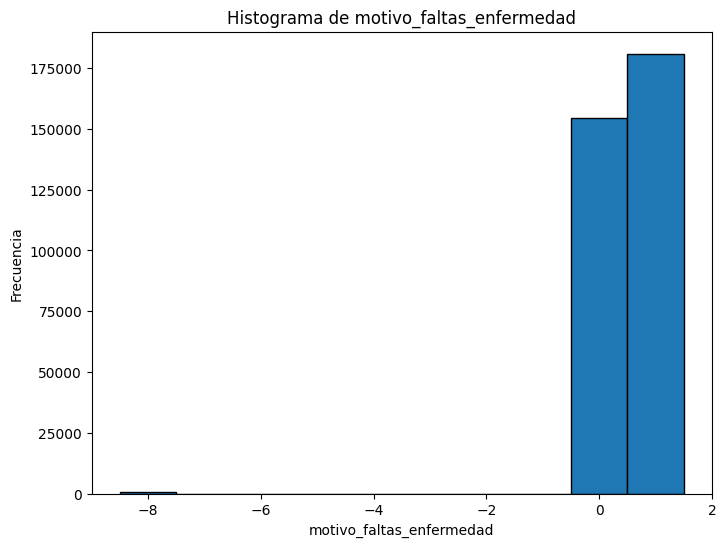

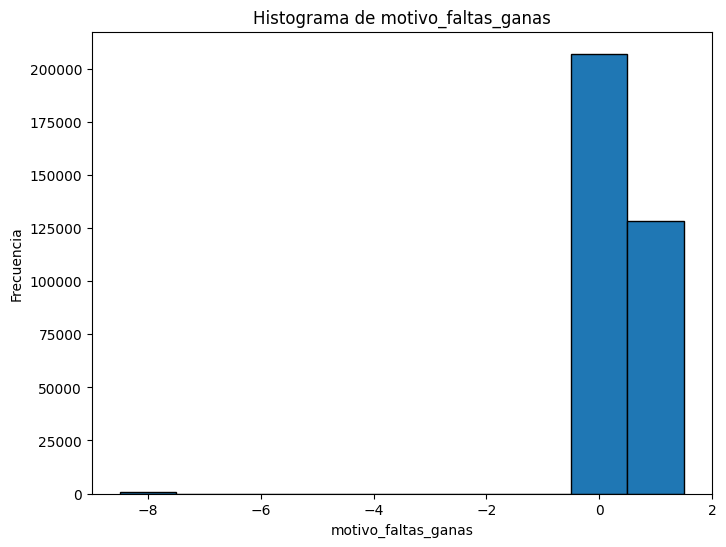

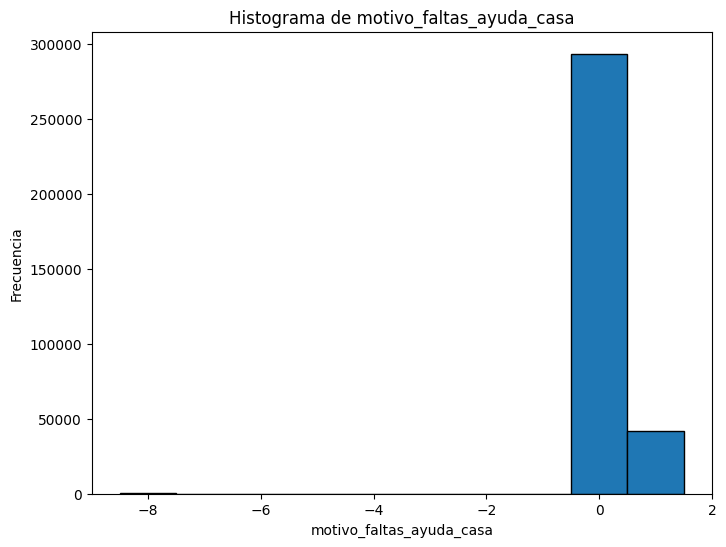

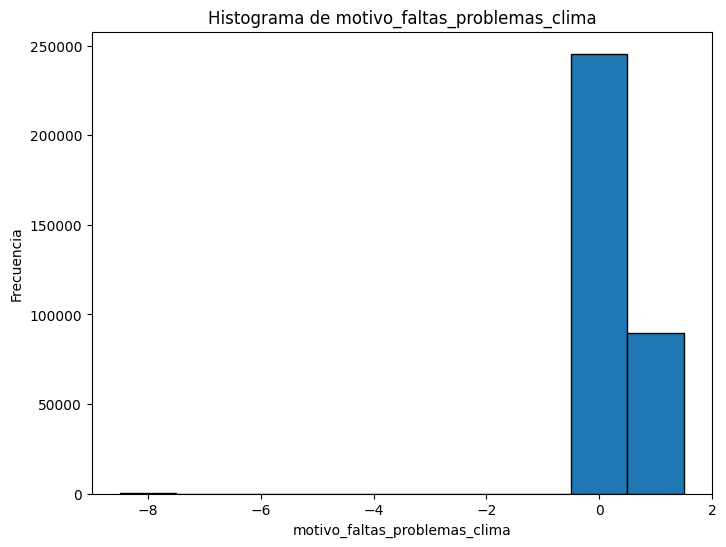

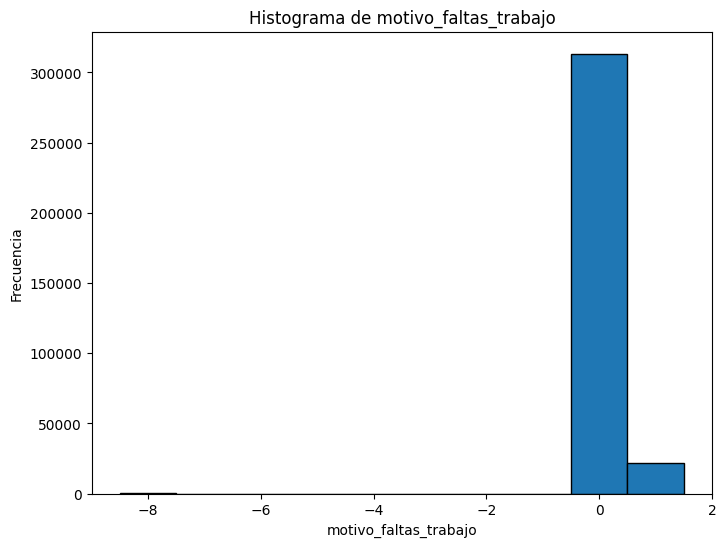

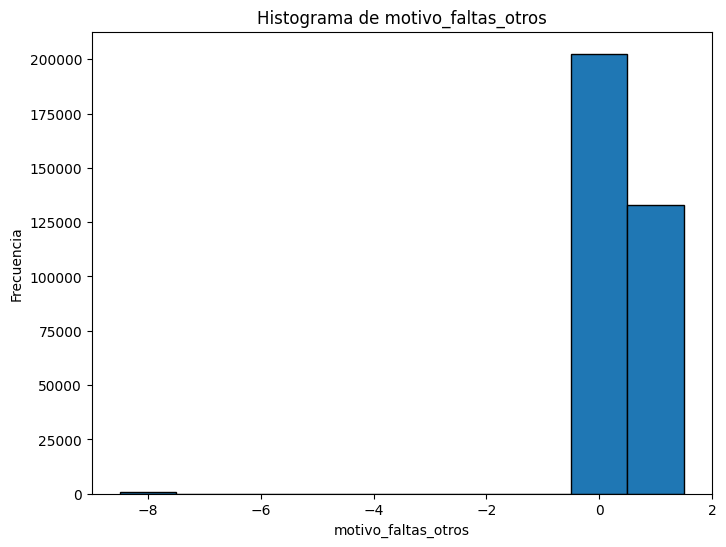

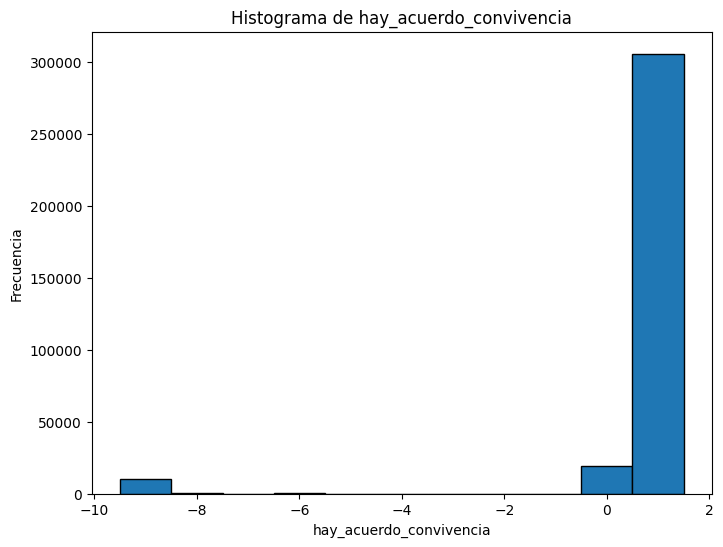

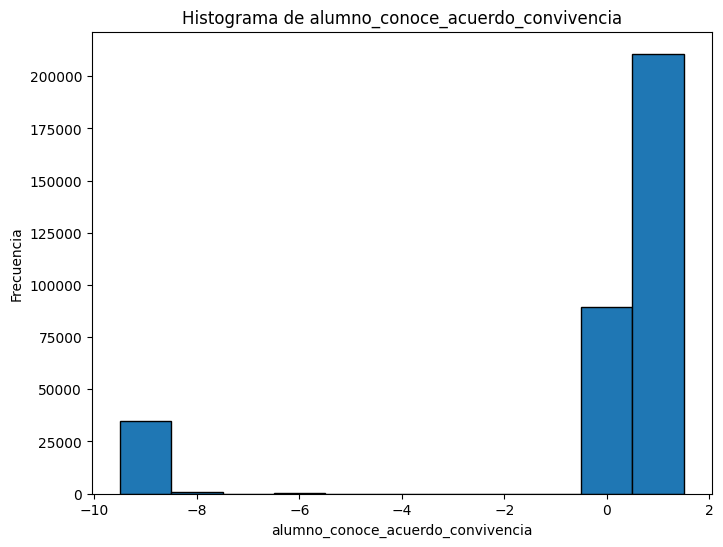

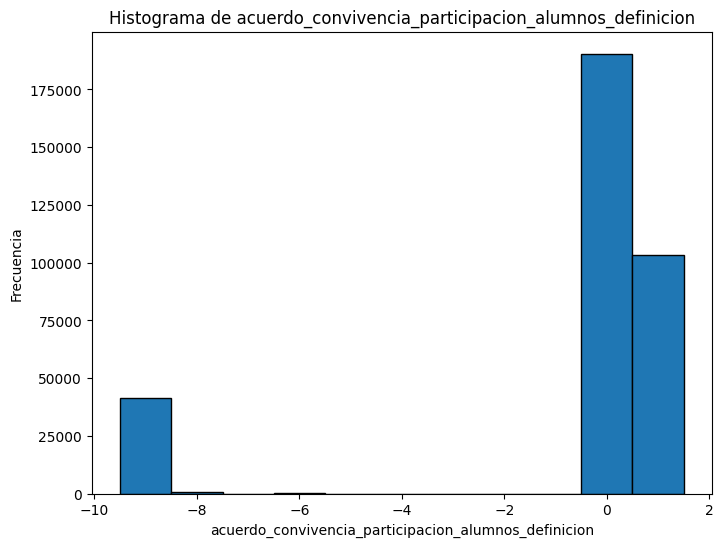

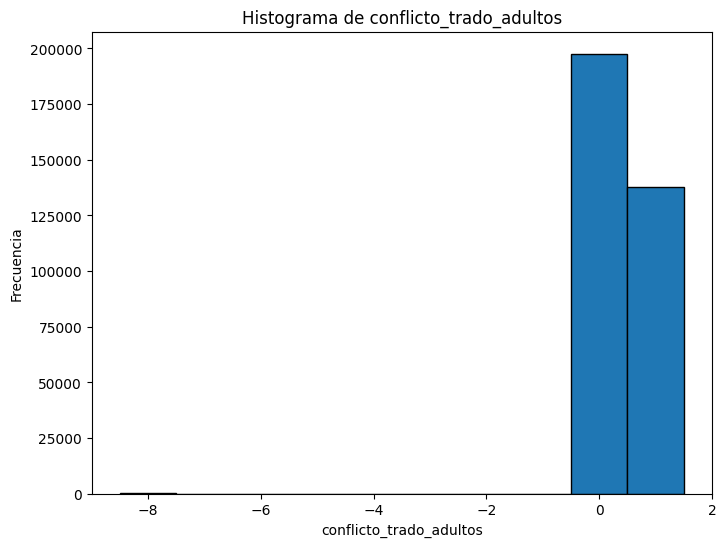

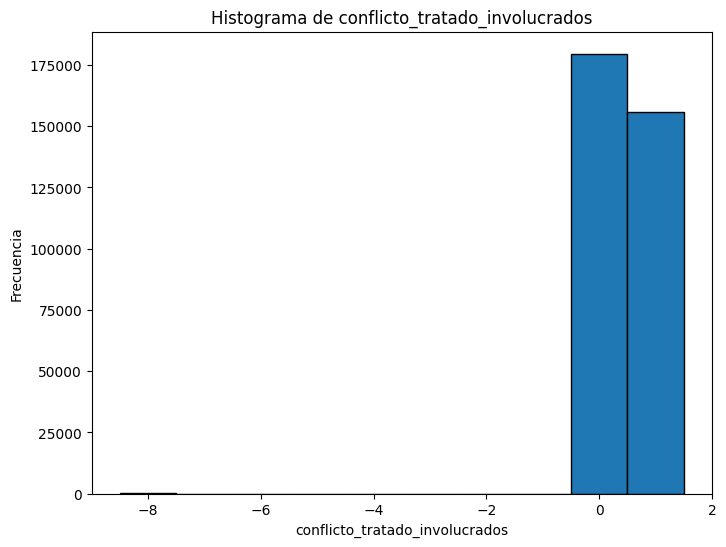

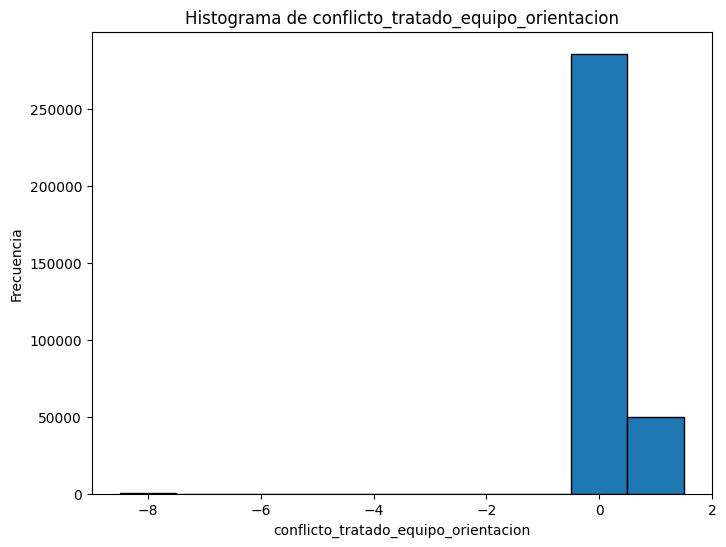

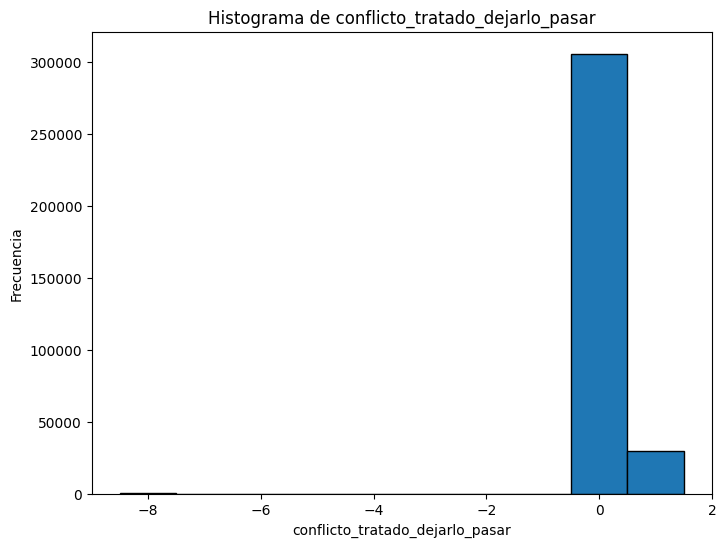

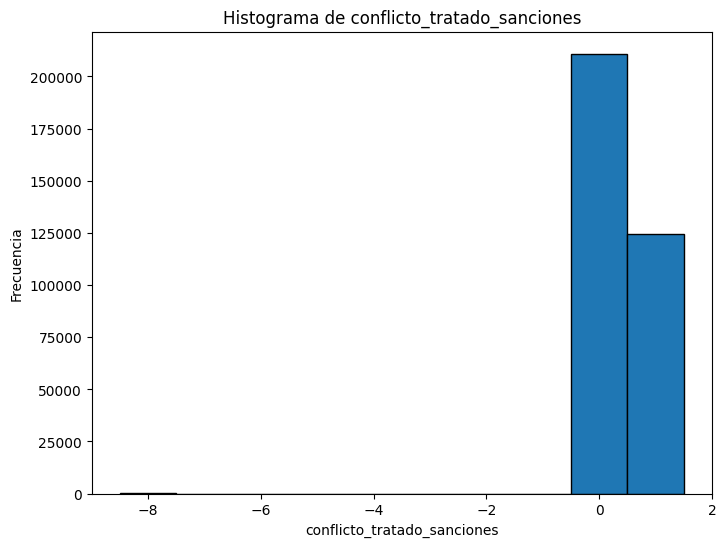

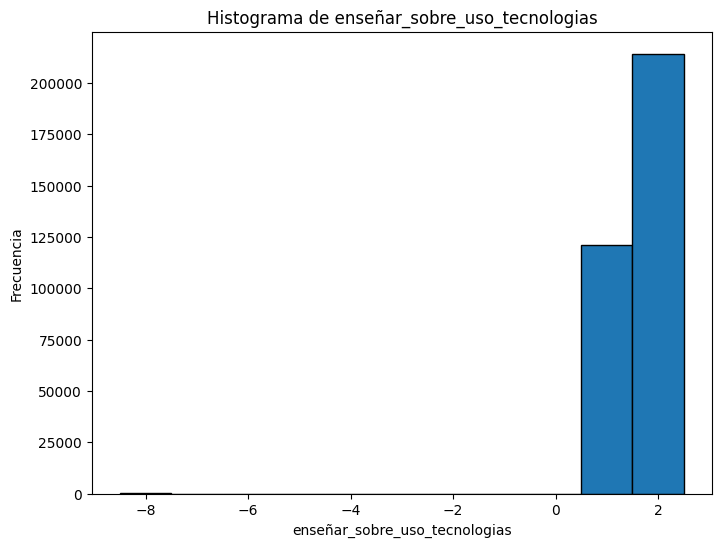

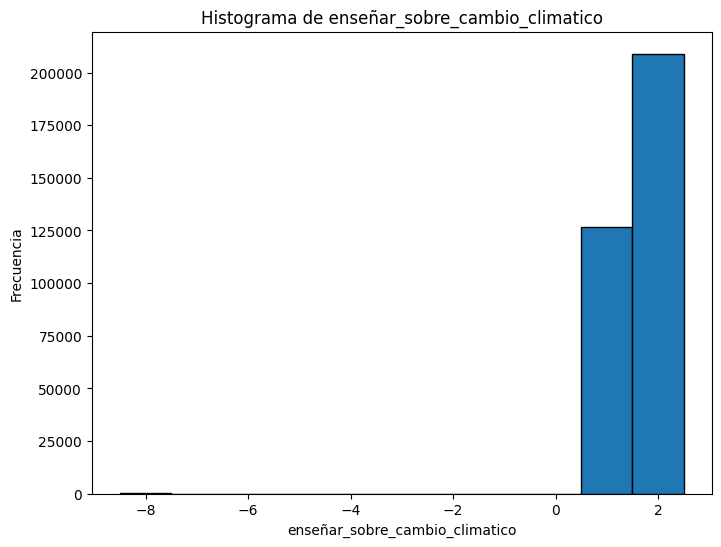

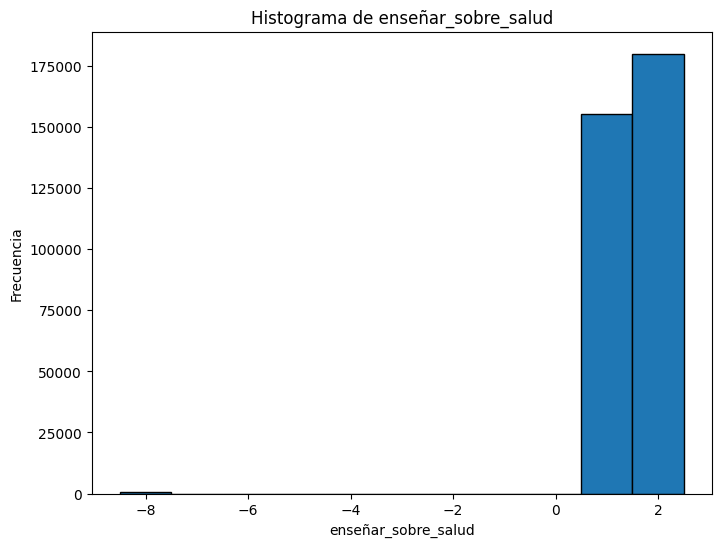

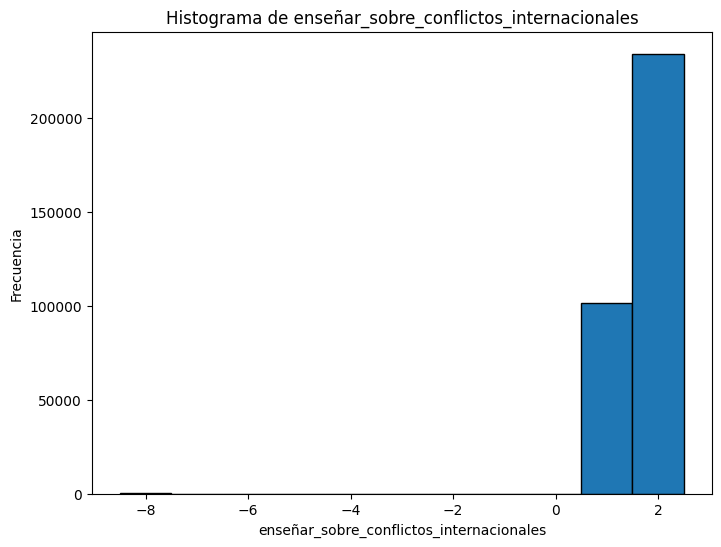

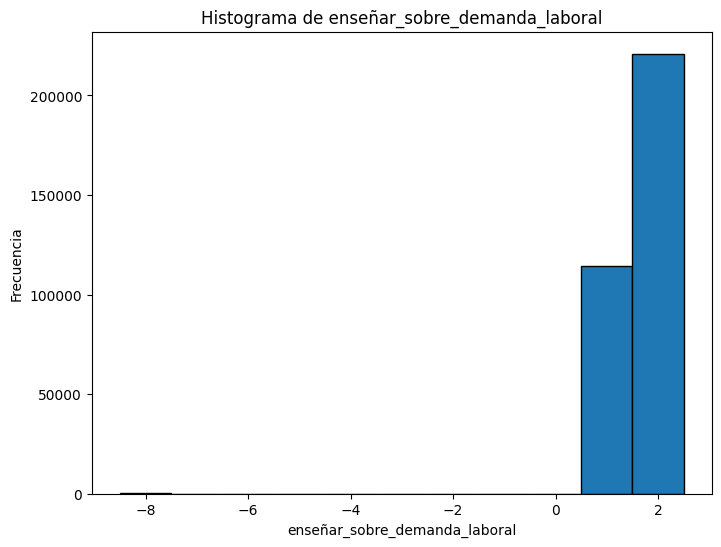

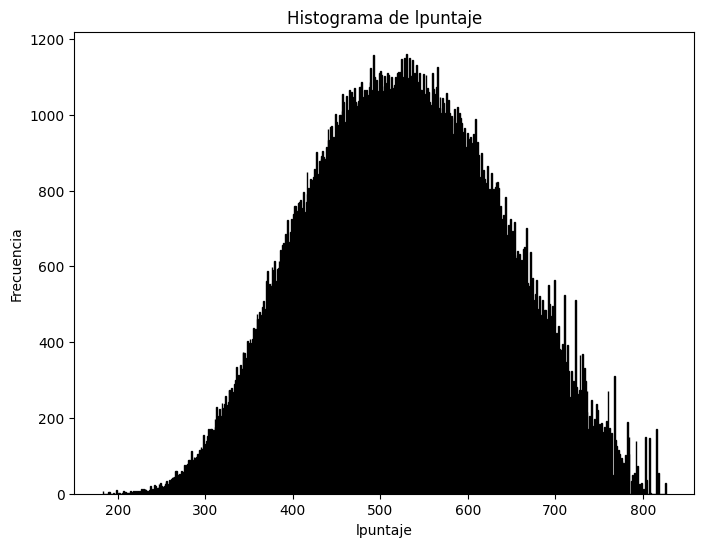

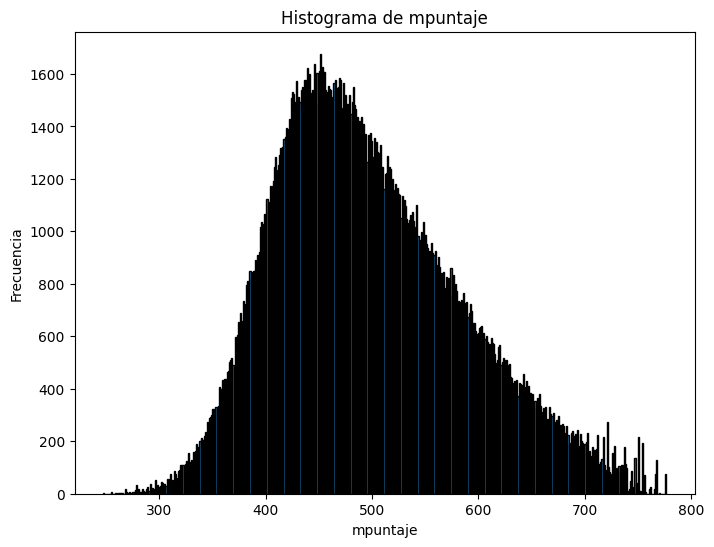

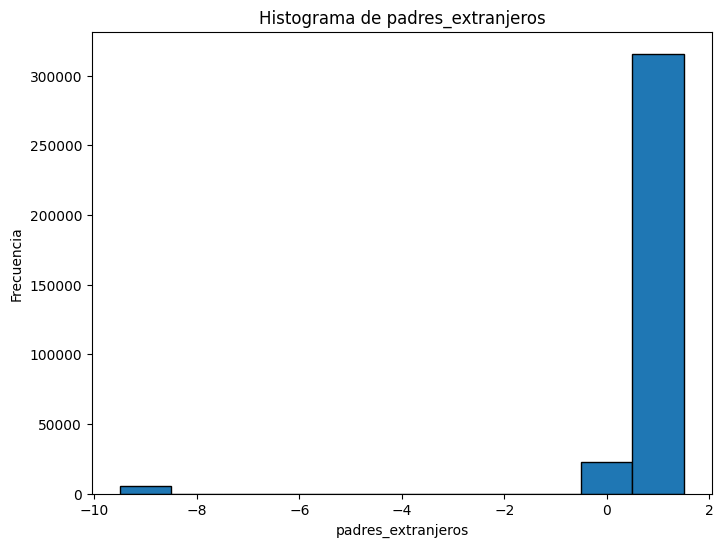

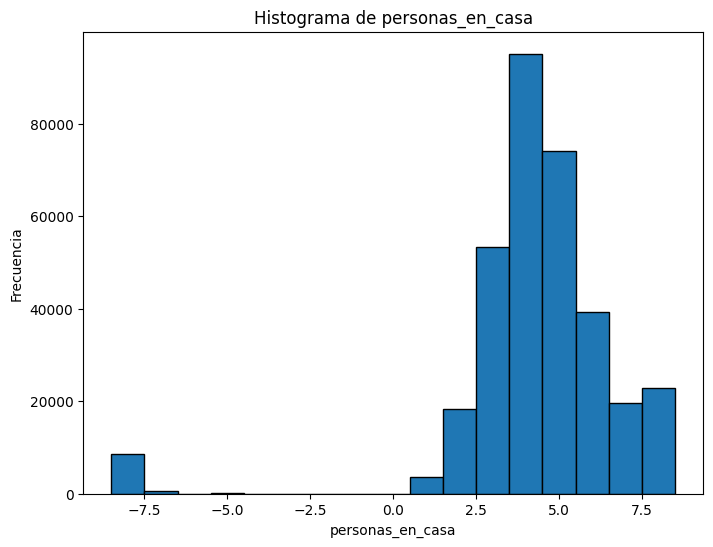

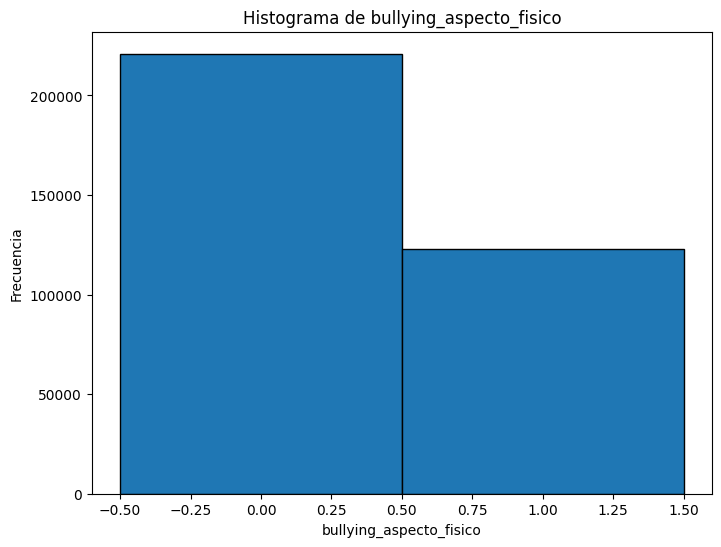

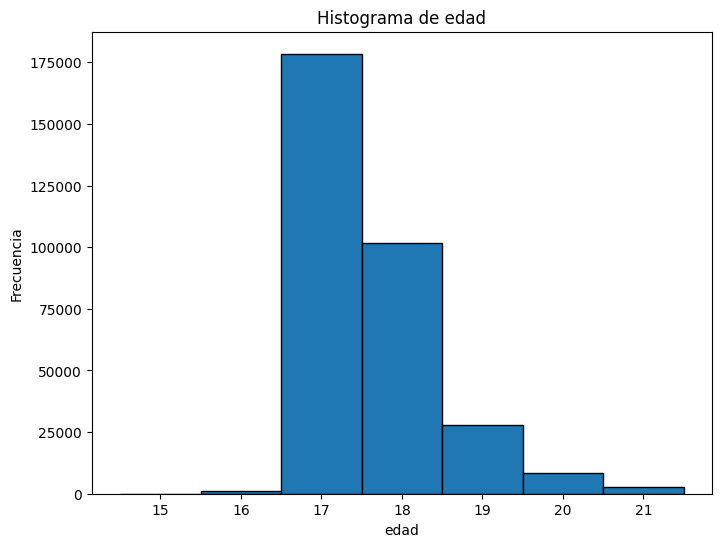

In [ ]:
# prompt: Me podes generar un histograma para cada una de las columnas del dataframe

for column in df_2019.columns:
  try:
    plt.figure(figsize=(8, 6))
    plt.hist(df_2019[column].dropna(), bins=np.arange(df_2019[column].min(), df_2019[column].max() + 1.5) - 0.5, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()
  except:
    print(f"No se puede generar un histograma para la columna {column}")

#### Nulificacion de valores negativos

Aquí se convierten todos los valores negativos en nulls

In [ ]:
for column in df_2019.columns:
  try:
    df_2019.loc[df_2019[column] <= -1, column] = np.nan
  except:
    pass

#### Comprobaciones

In [ ]:
df_2019.describe()

ID1  cod_provincia         sector         ambito  seccion  \
count  3.437500e+05  343750.000000  343750.000000  343750.000000      0.0   
mean   4.177330e+14      31.479959       1.382345       1.087953      NaN   
std    2.413496e+14      30.151272       0.485961       0.283228      NaN   
min    3.600800e+13       2.000000       1.000000       1.000000      NaN   
25%    2.086500e+14       6.000000       1.000000       1.000000      NaN   
50%    3.621000e+14      14.000000       1.000000       1.000000      NaN   
75%    5.960000e+14      54.000000       2.000000       1.000000      NaN   
max    1.000000e+15      94.000000       2.000000       2.000000      NaN   

            idalumno           sexo  nacionalidad_alumno     vive_madre  \
count  343750.000000  327991.000000        331001.000000  335278.000000   
mean       51.739991       1.543173             1.194631       0.880920   
std       195.380806       0.498133             1.316034       0.323883   
min         1.000000       1.000000             1.000000       0.000000   
25%         5.000000       1.000000             1.000000       1.000000   
50%        10.000000       2.000000             1.000000       1.000000   
75%        17.000000       2.000000             1.000000       1.000000   
max       999.000000       2.000000            14.000000       1.000000   

          vive_padre  ...  enseñar_sobre_cambio_climatico  \
count  335278.000000  ...                   335439.000000   
mean        0.661004  ...                        1.623076   
std         0.473369  ...                        0.484616   
min         0.000000  ...                        1.000000   
25%         0.000000  ...                        1.000000   
50%         1.000000  ...                        2.000000   
75%         1.000000  ...                        2.000000   
max         1.000000  ...                        2.000000   

       enseñar_sobre_salud  enseñar_sobre_conflictos_internacionales  \
count        335439.000000                             335439.000000   
mean              1.536542                                  1.697736   
std               0.498664                                  0.459240   
min               1.000000                                  1.000000   
25%               1.000000                                  1.000000   
50%               2.000000                                  2.000000   
75%               2.000000                                  2.000000   
max               2.000000                                  2.000000   

       enseñar_sobre_demanda_laboral       lpuntaje       mpuntaje  \
count                  335439.000000  329082.000000  324704.000000   
mean                        1.658990     525.817998     496.452785   
std                         0.474049     108.715246      87.680986   
min                         1.000000     183.249240     247.172530   
25%                         1.000000     446.049645     431.556933   
50%                         2.000000     524.543030     484.360320   
75%                         2.000000     604.575115     552.788542   
max                         2.000000     826.153500     776.616700   

       padres_extranjeros  personas_en_casa  bullying_aspecto_fisico  \
count       338566.000000     326416.000000            343750.000000   
mean             0.932725          4.620558                 0.356969   
std              0.250498          1.573923                 0.479106   
min              0.000000          1.000000                 0.000000   
25%              1.000000          4.000000                 0.000000   
50%              1.000000          4.000000                 0.000000   
75%              1.000000          6.000000                 1.000000   
max              1.000000          8.000000                 1.000000   

               edad  
count  319772.00000  
mean       17.59887  
std         0.82215  
min        15.00000  
25%        17.00000  
50%        17.00000  
75%        18

In [ ]:
# prompt: como puedo ver todos los valores de todas las columnas del describe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df_2019.describe())

                ID1  cod_provincia         sector         ambito  seccion  \
count  3.437500e+05  343750.000000  343750.000000  343750.000000      0.0   
mean   4.177330e+14      31.479959       1.382345       1.087953      NaN   
std    2.413496e+14      30.151272       0.485961       0.283228      NaN   
min    3.600800e+13       2.000000       1.000000       1.000000      NaN   
25%    2.086500e+14       6.000000       1.000000       1.000000      NaN   
50%    3.621000e+14      14.000000       1.000000       1.000000      NaN   
75%    5.960000e+14      54.000000       2.000000       1.000000      NaN   
max    1.000000e+15      94.000000       2.000000       2.000000      NaN   

            idalumno           sexo  nacionalidad_alumno     vive_madre  \
count  343750.000000  327991.000000        331001.000000  335278.000000   
mean       51.739991       1.543173             1.194631       0.880920   
std       195.380806       0.498133             1.316034       0.323883   
min   

In [ ]:
# prompt: Mostrar todas las columnas del dataframe

df_2019.columns

Index(['ID1', 'cod_provincia', 'sector', 'ambito', 'seccion', 'idalumno',
       'sexo', 'nacionalidad_alumno', 'vive_madre', 'vive_padre',
       'vive_hermano', 'vive_hijo', 'vive_tio', 'vive_abuelo', 'vive_pareja',
       'vive_amigos', 'vive_otro', 'tiene_hijos', 'habitaciones_en_casa',
       'tiene_auto', 'tiene_baño', 'tiene_computadora', 'tiene_tablet',
       'tiene_internet', 'celular_propio', 'celular_propio_internet',
       'libros_casa', 'nivel_educativo_madre', 'nivel_educativo_padre',
       'cuida_familiar', 'realiza_tareas_hogar', 'ayuda_trabajo_padres',
       'dias_trabajo_fuera_casa', 'trabaja_remunerado',
       'fuera_escuela_junto_amigos', 'fuera_escuela_idioma',
       'fuera_escuela_leer', 'fuera_escuela_deporte',
       'fuera_escuela_clases_artes', 'fuera_escuela_television',
       'asistio_jardin', 'repitio_primaria', 'repitio_secundaria_1',
       'repitio_secundaria_2', 'faltas', 'motivo_faltas_enfermedad',
       'motivo_faltas_ganas', 'motivo_faltas_ay

No se puede generar un histograma para la columna ID1


<Figure size 800x600 with 0 Axes>

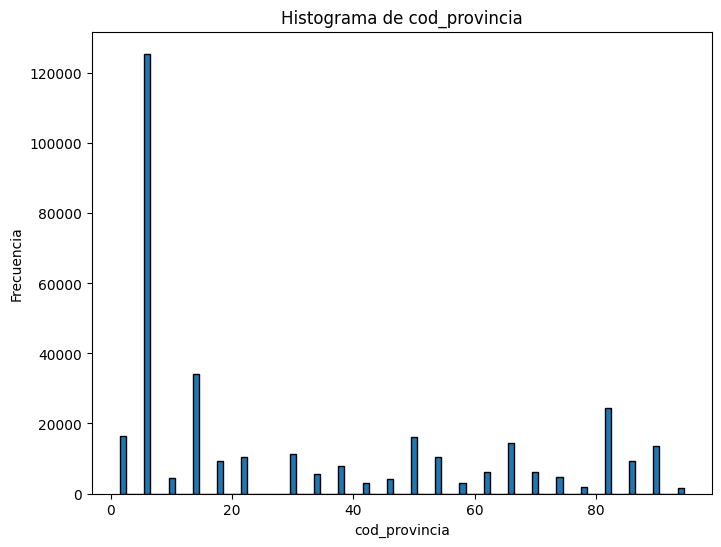

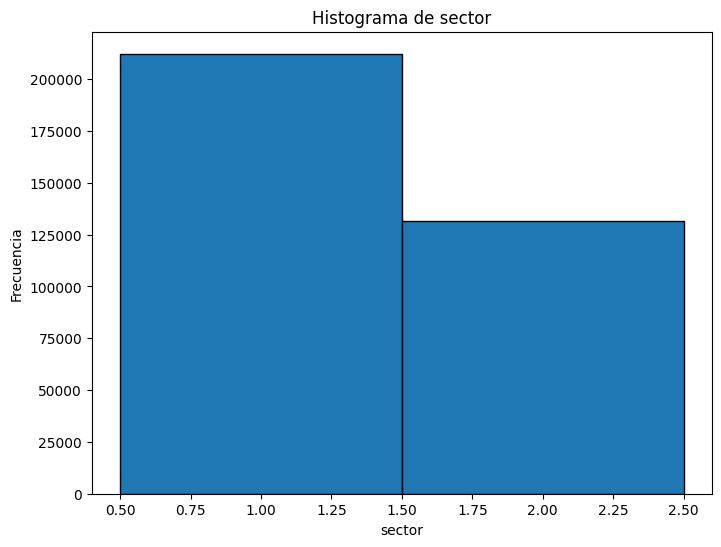

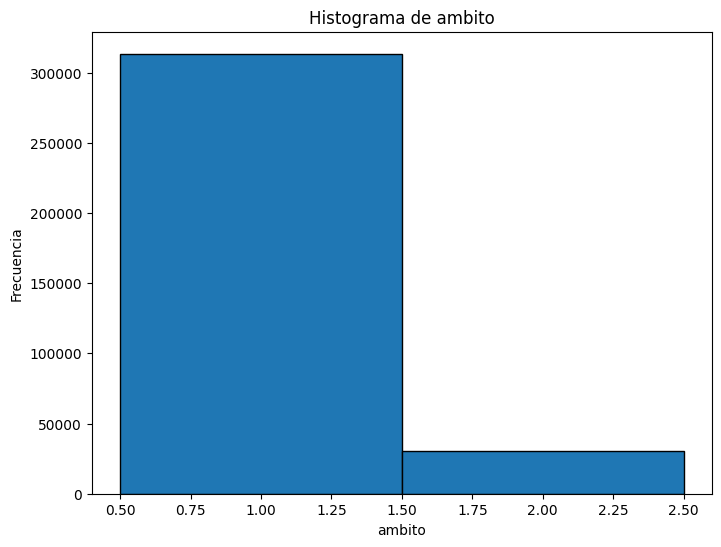

No se puede generar un histograma para la columna seccion


<Figure size 800x600 with 0 Axes>

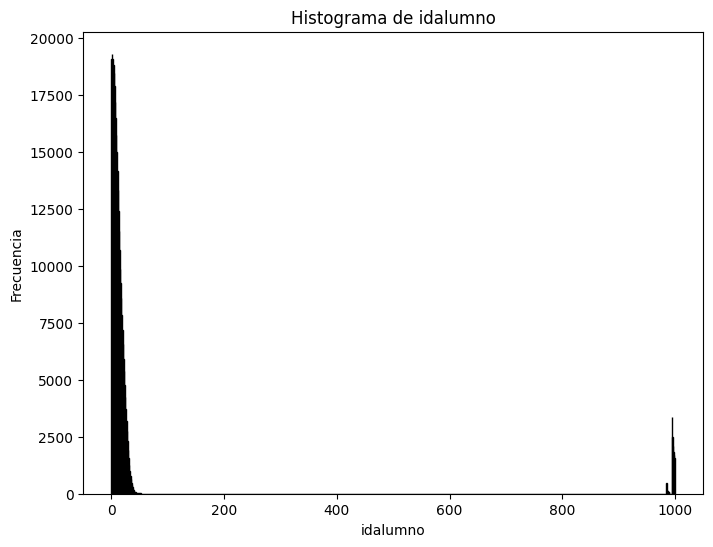

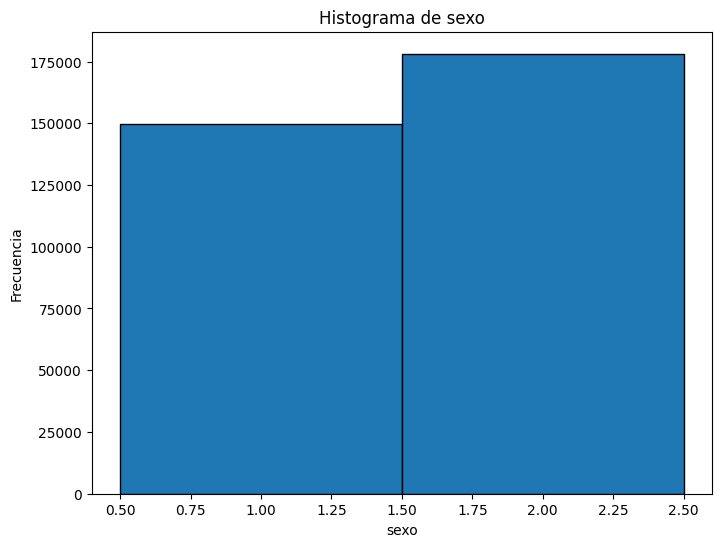

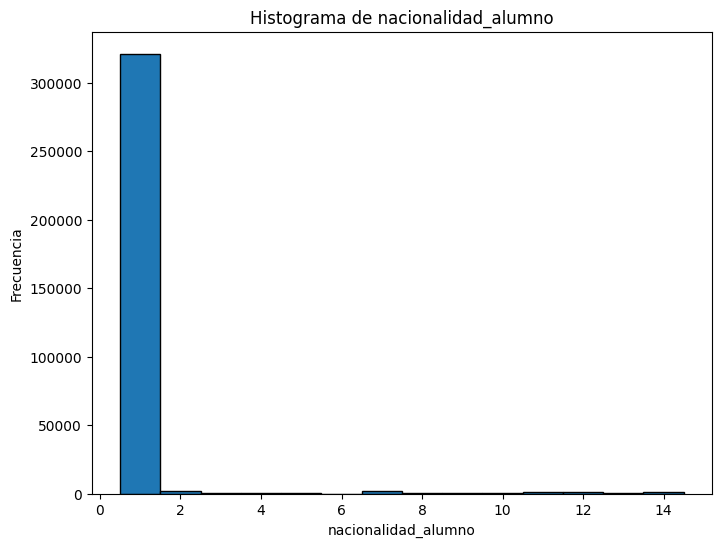

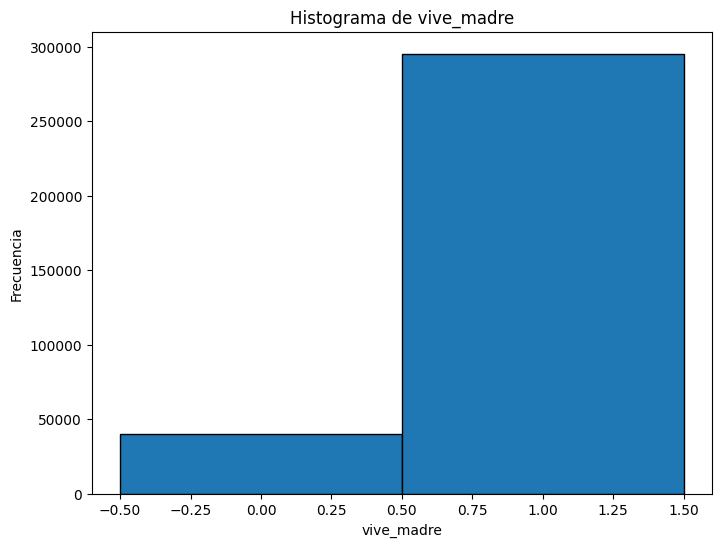

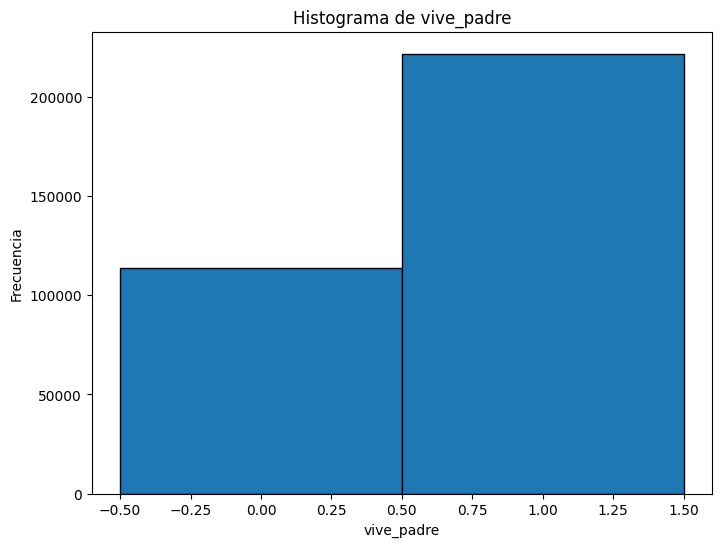

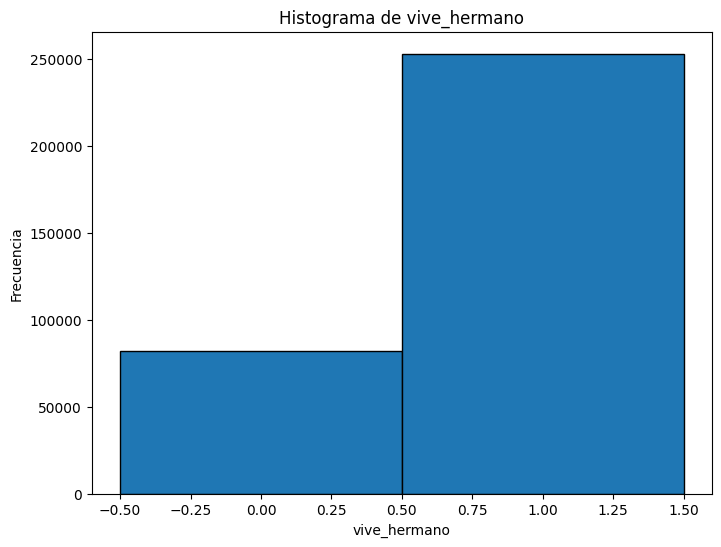

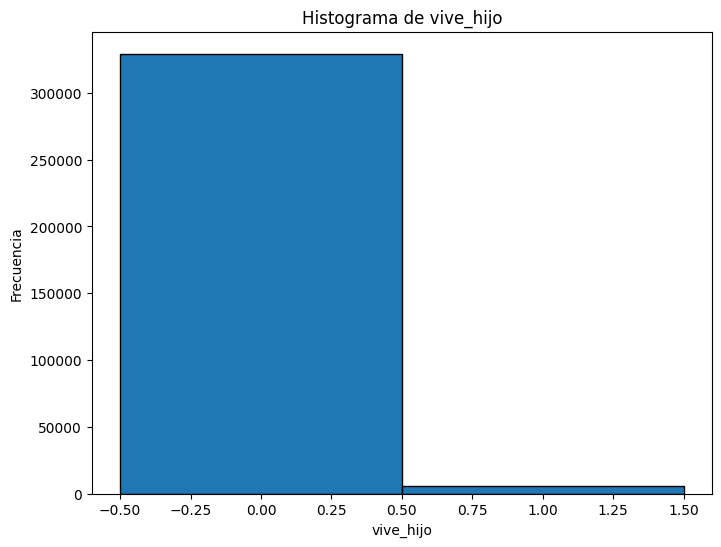

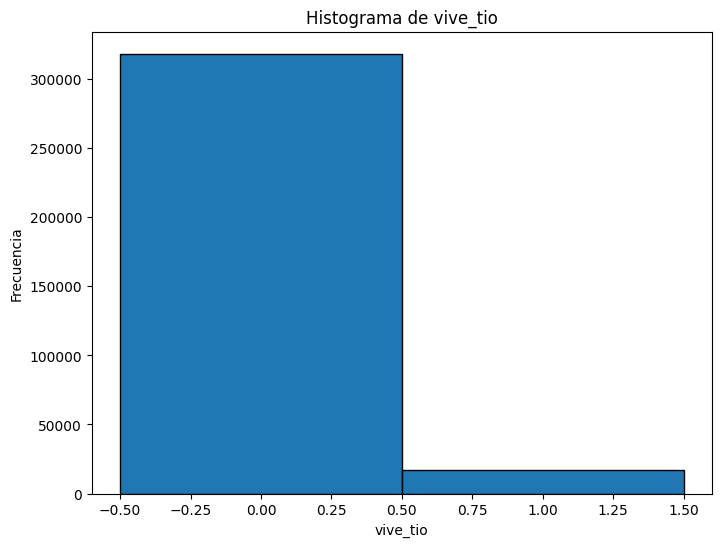

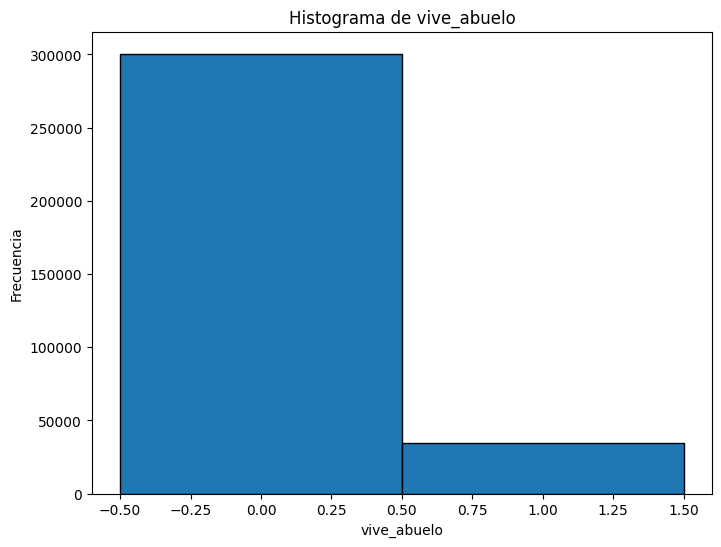

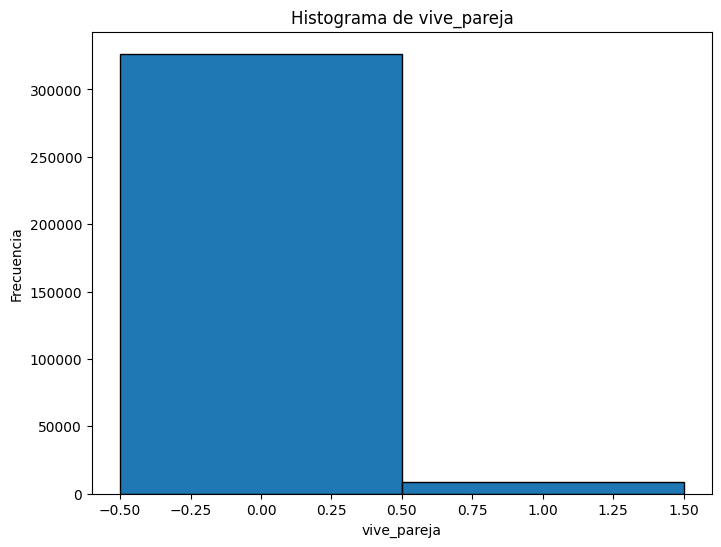

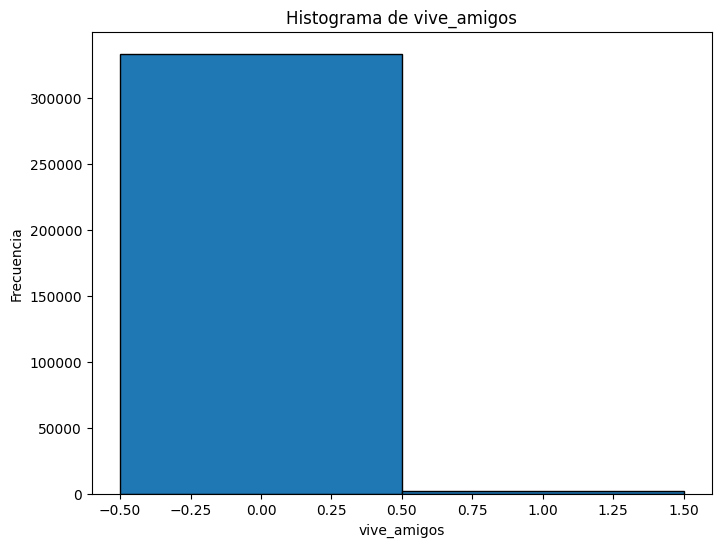

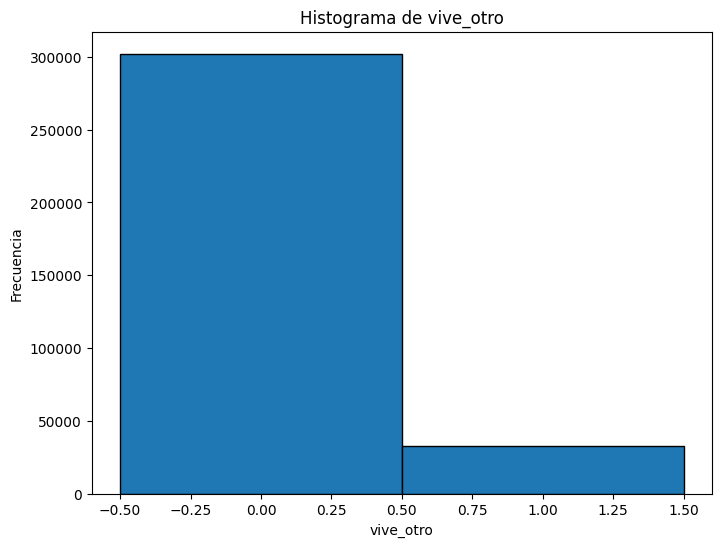

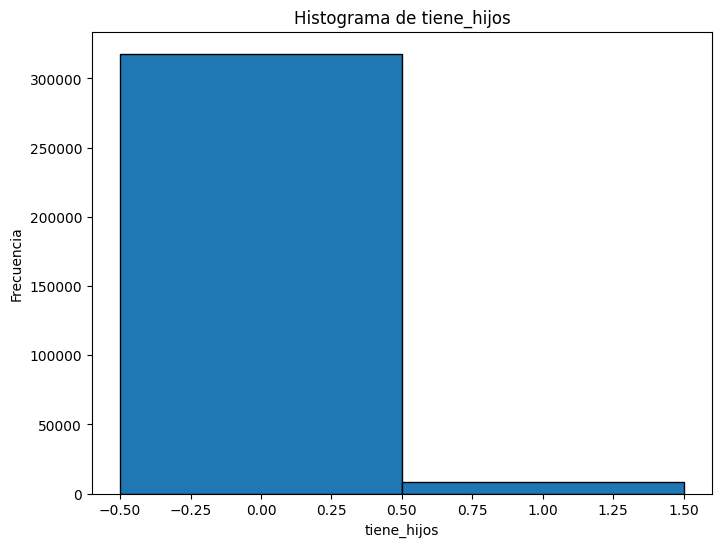

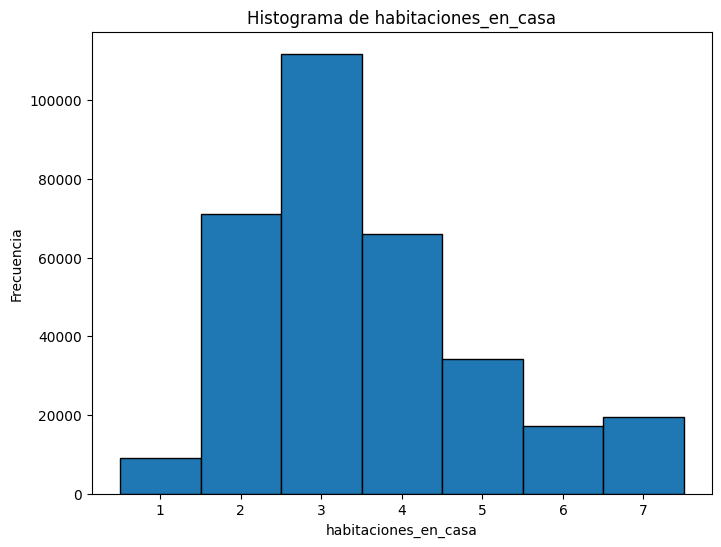

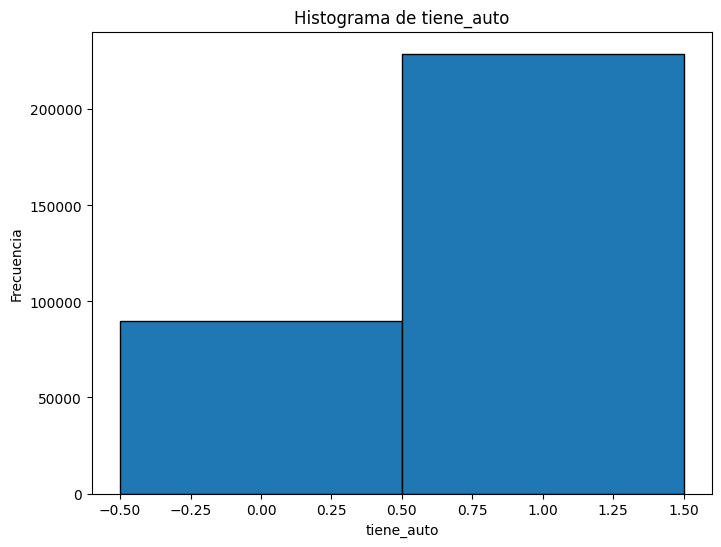

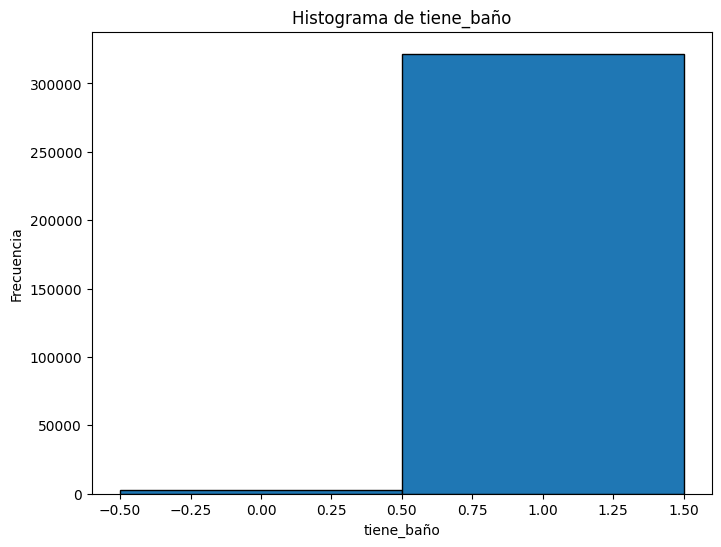

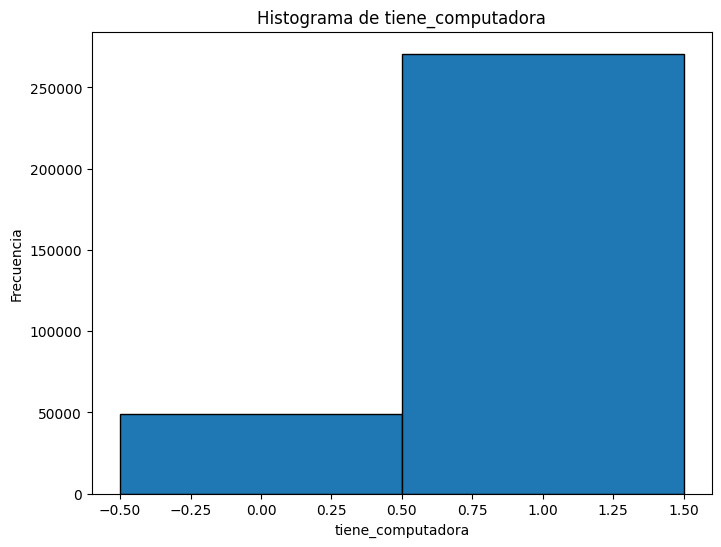

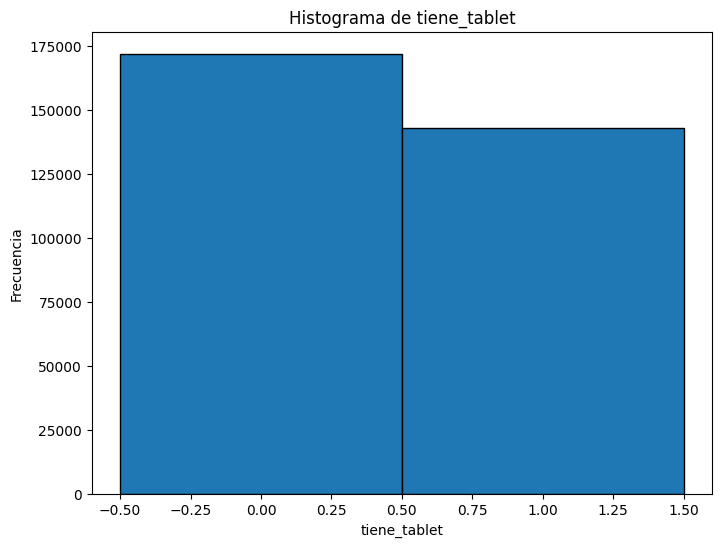

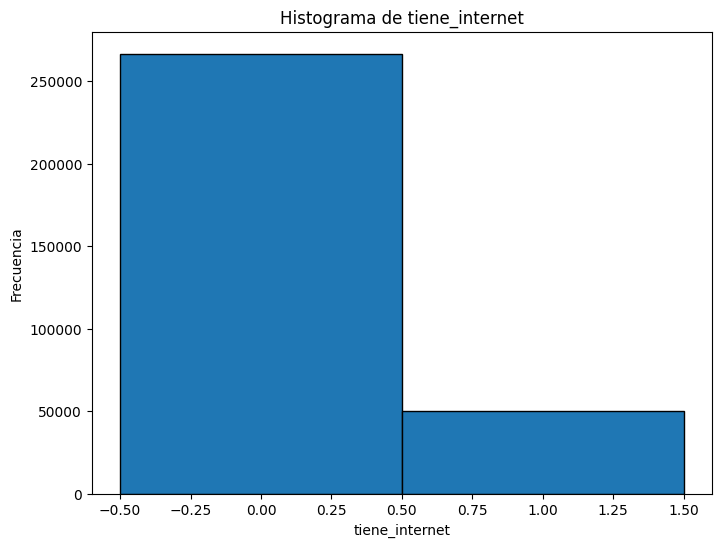

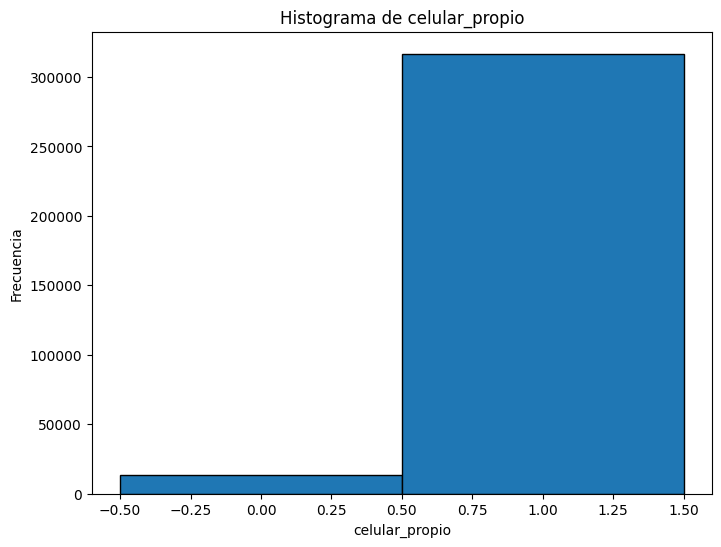

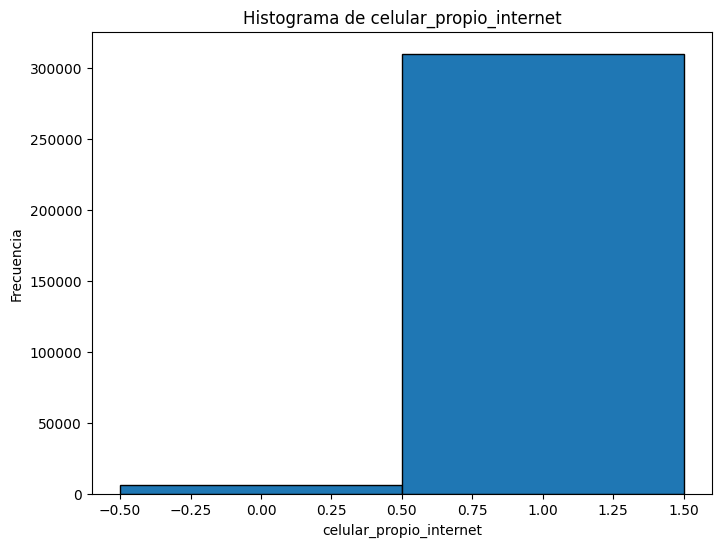

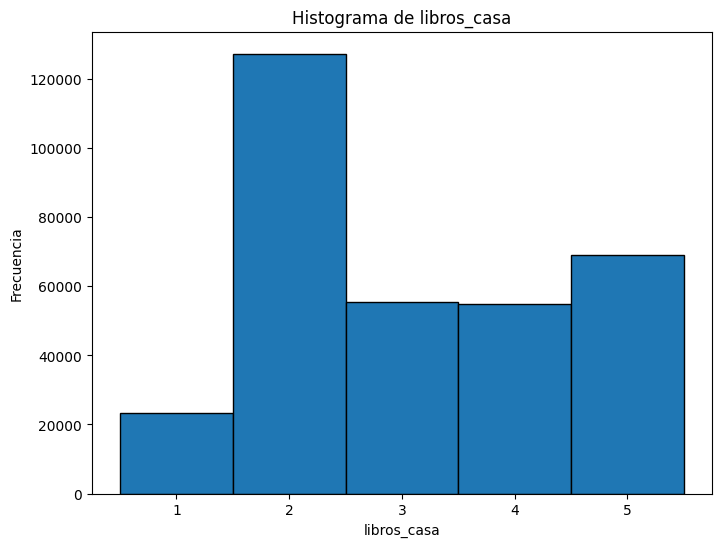

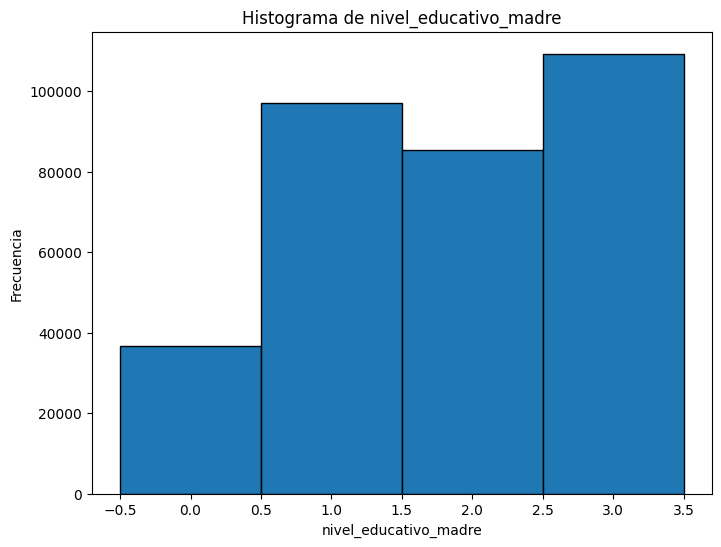

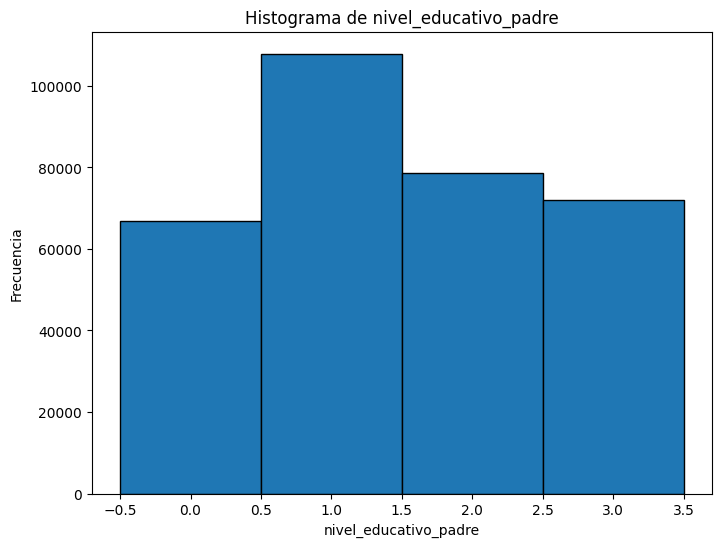

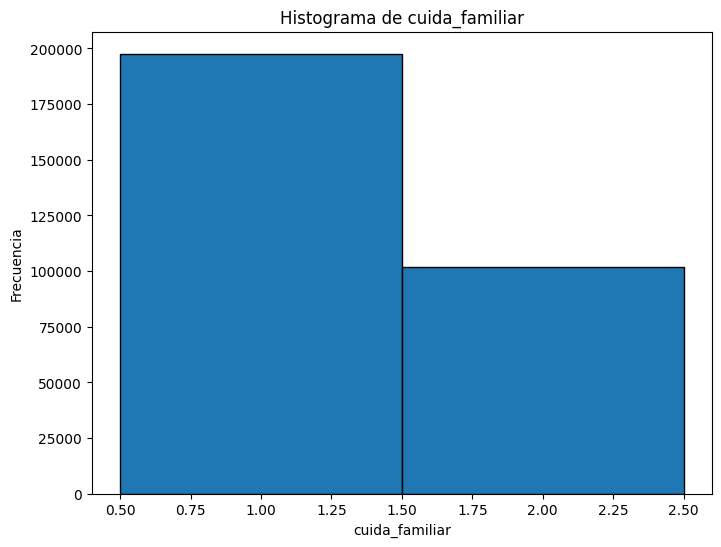

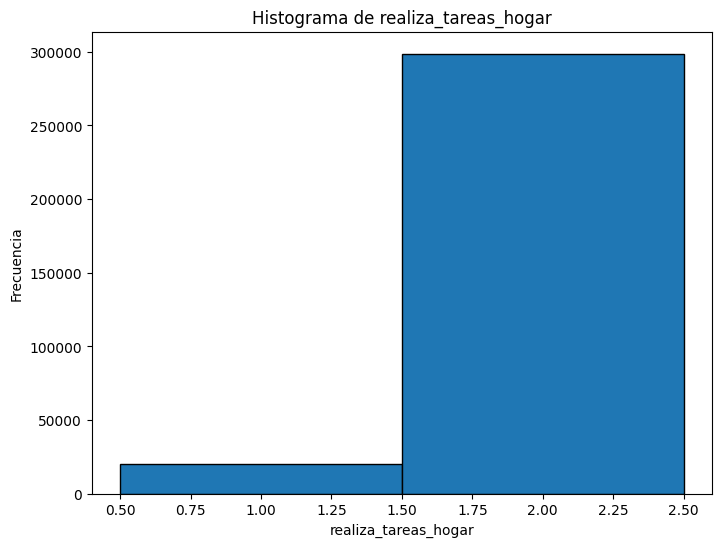

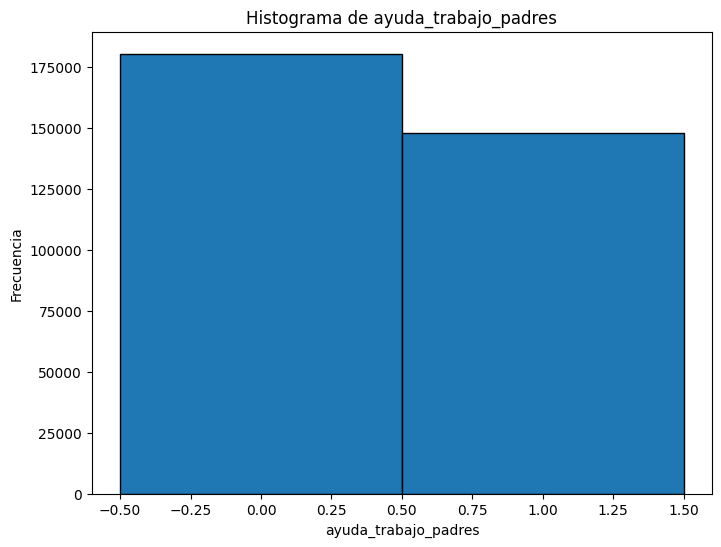

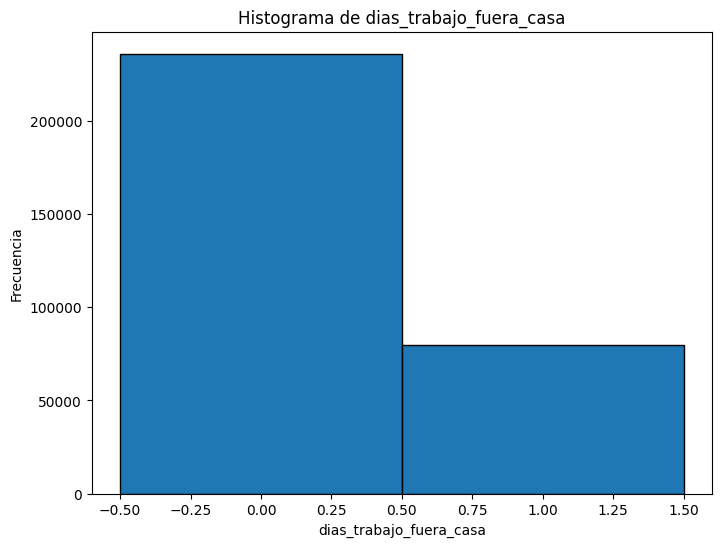

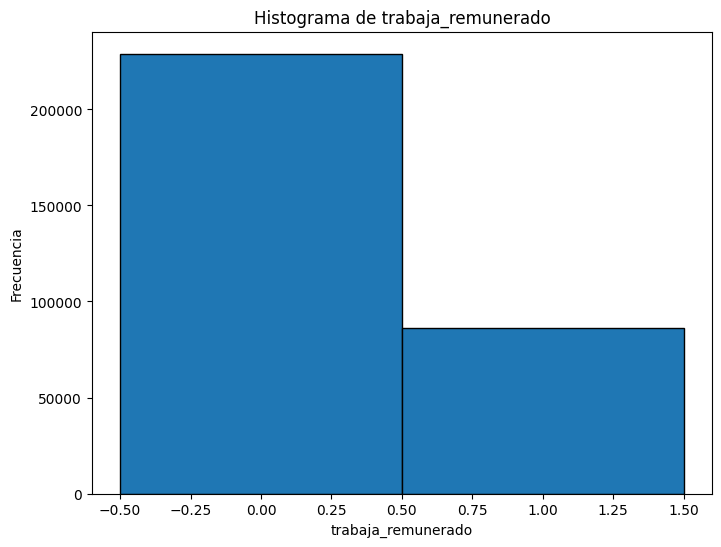

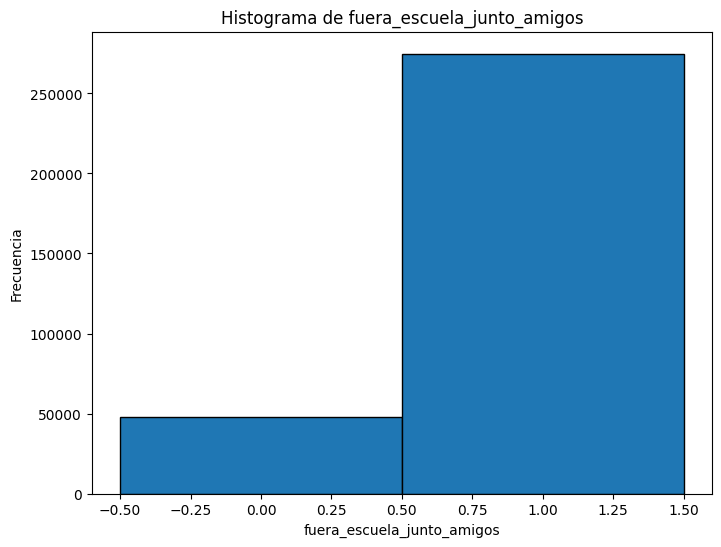

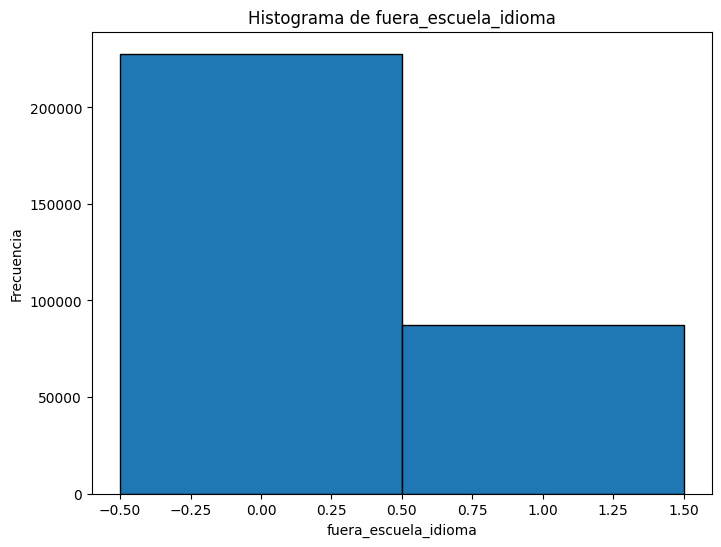

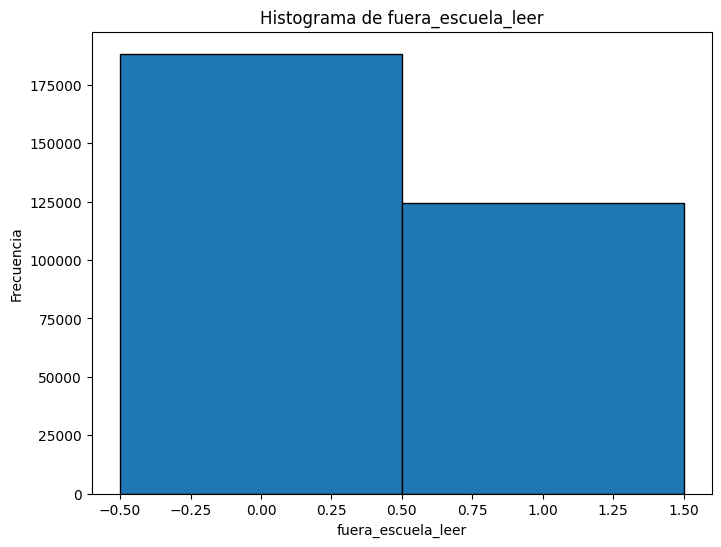

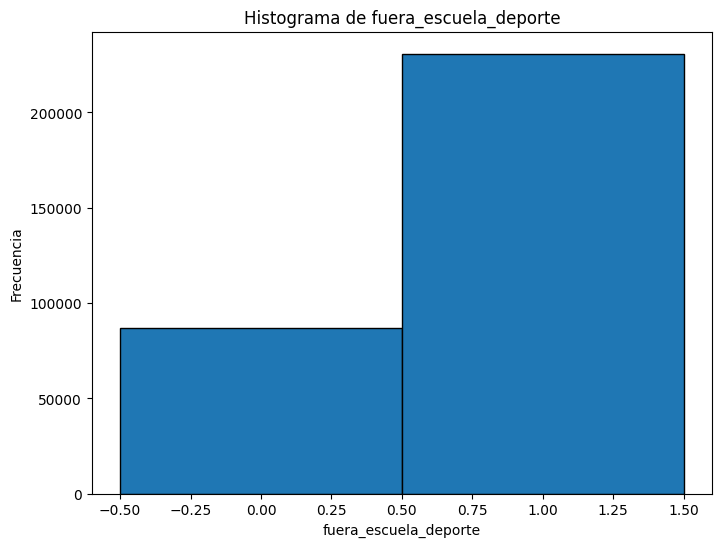

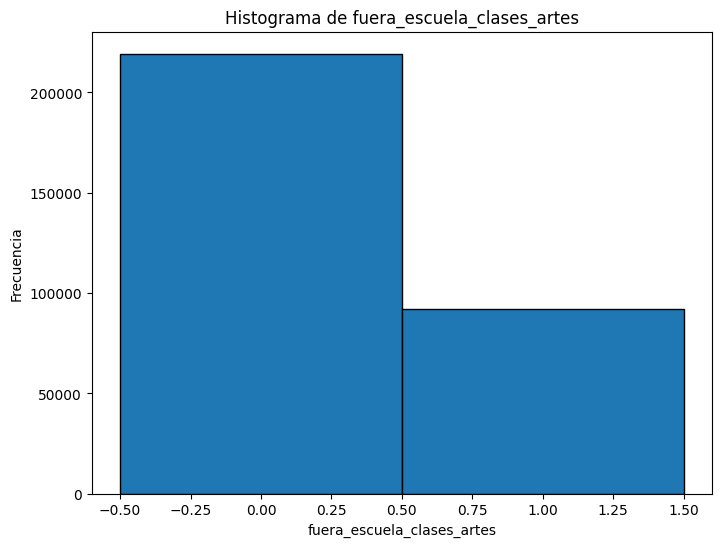

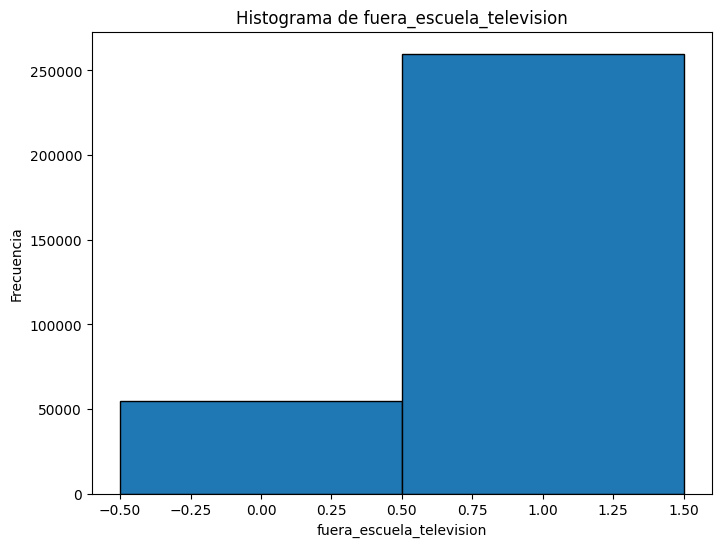

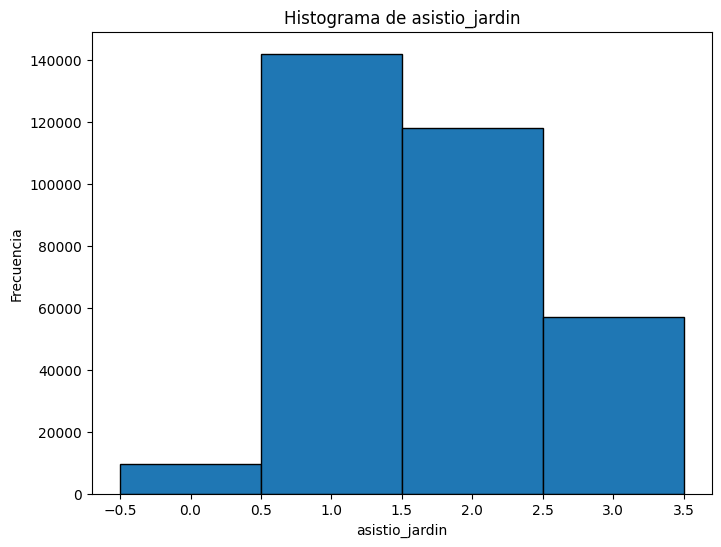

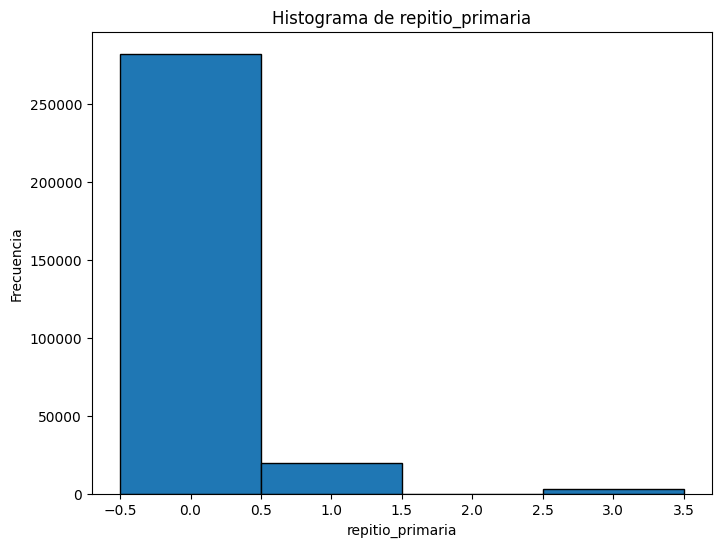

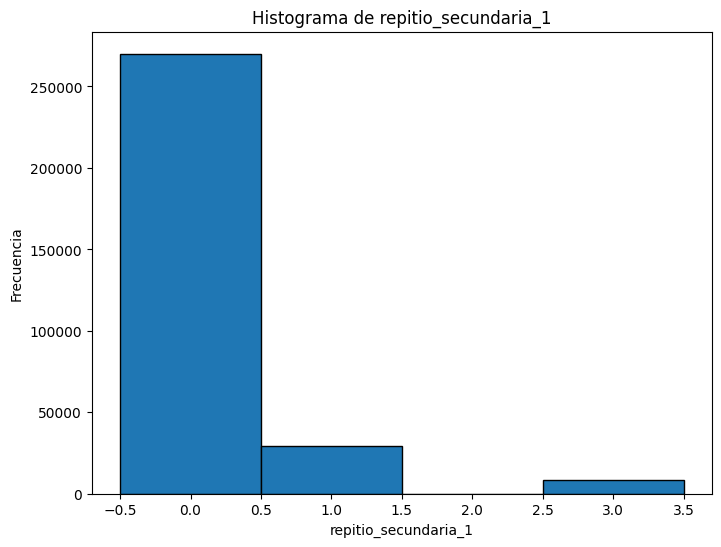

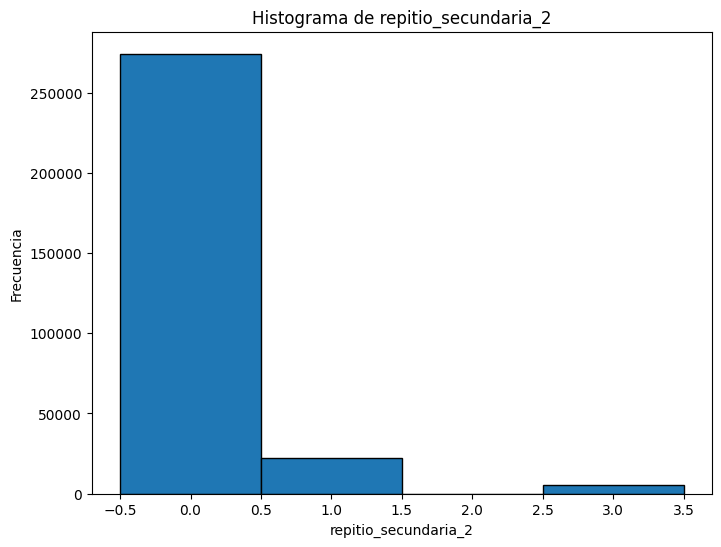

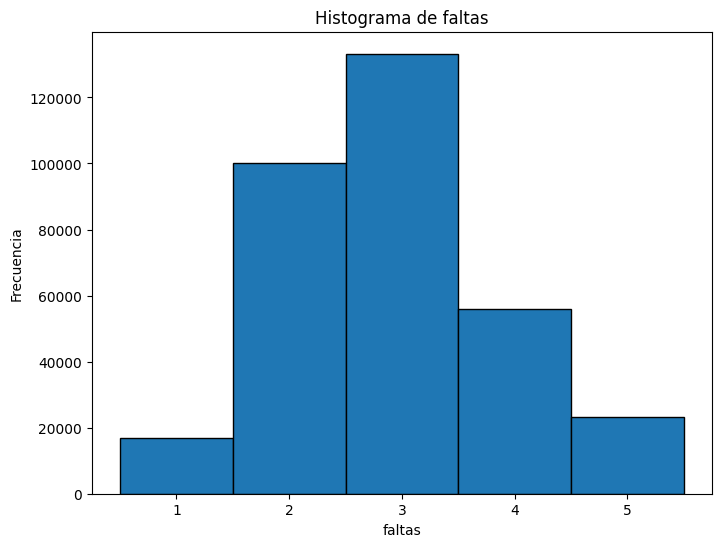

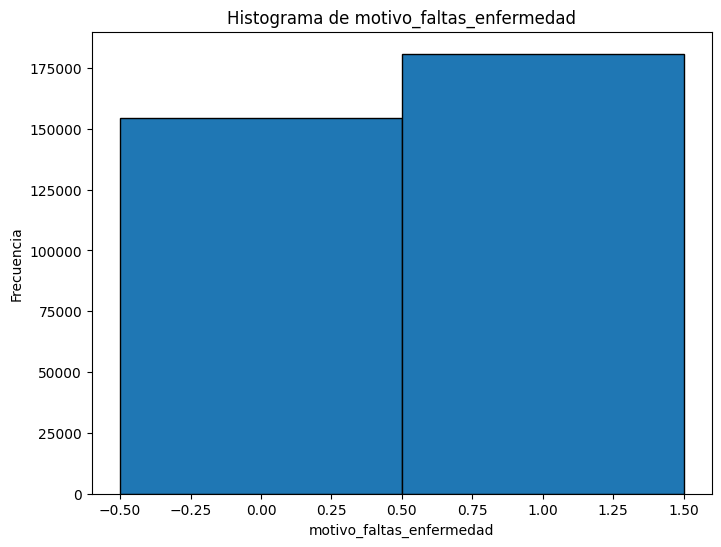

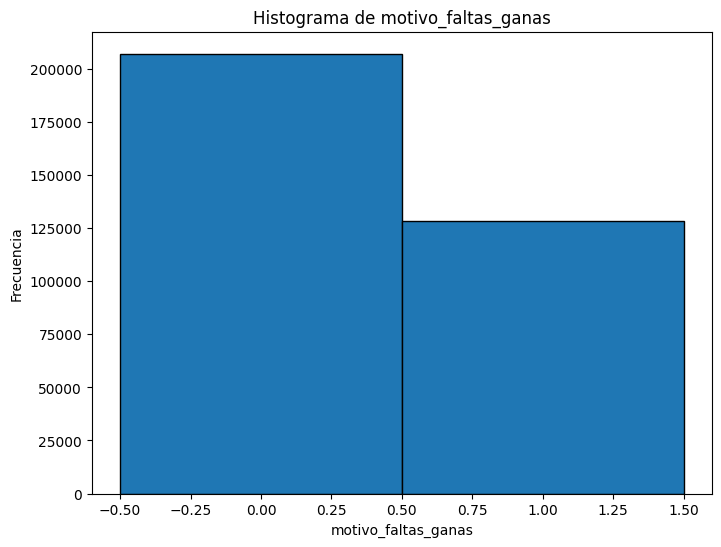

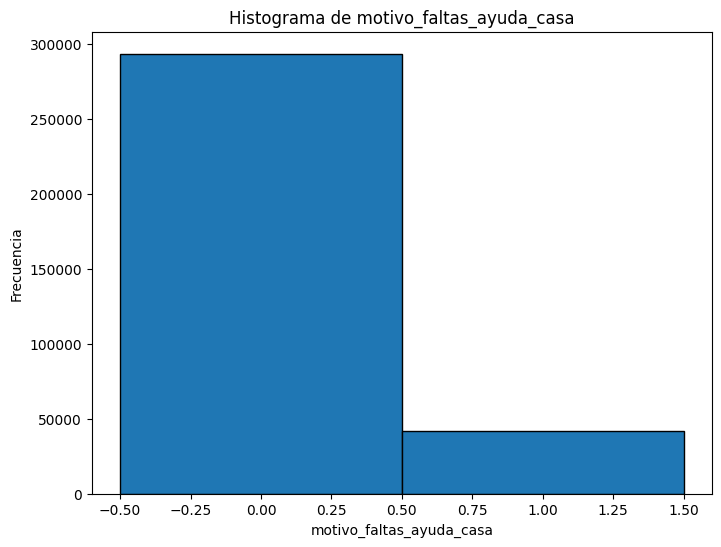

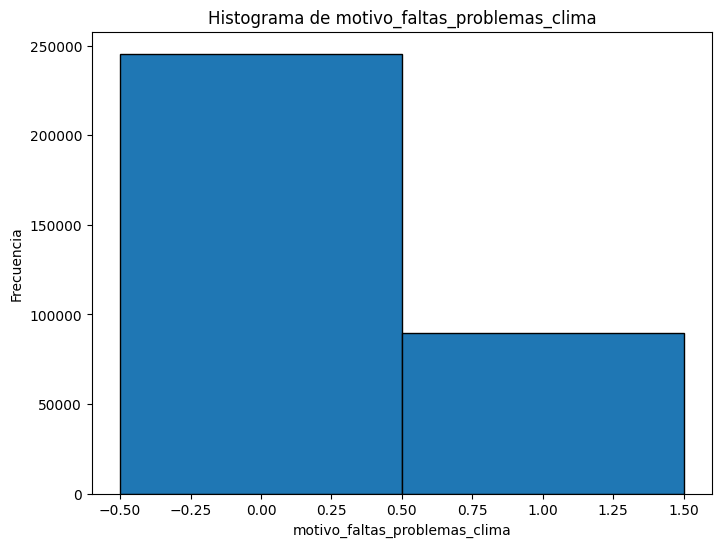

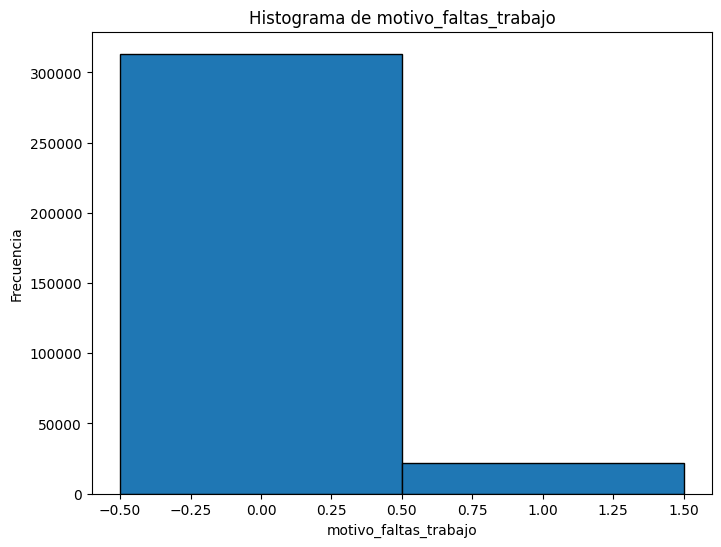

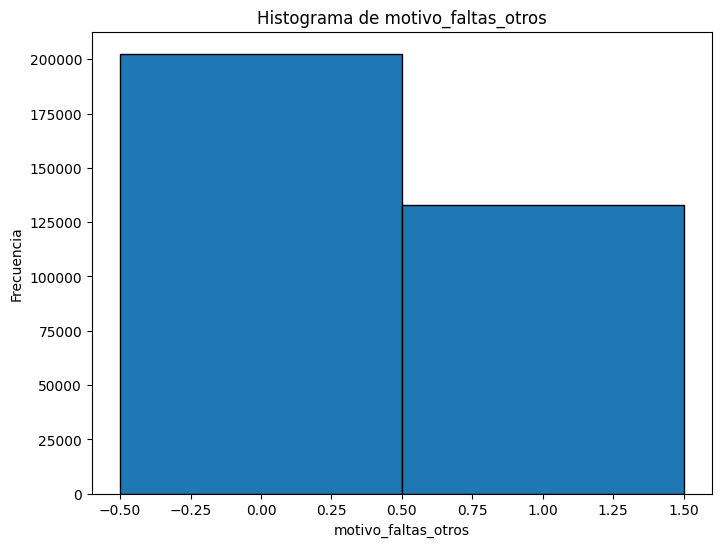

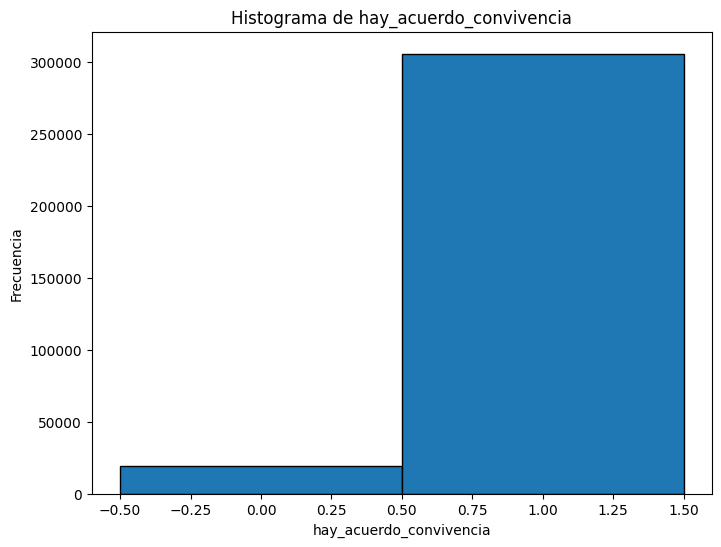

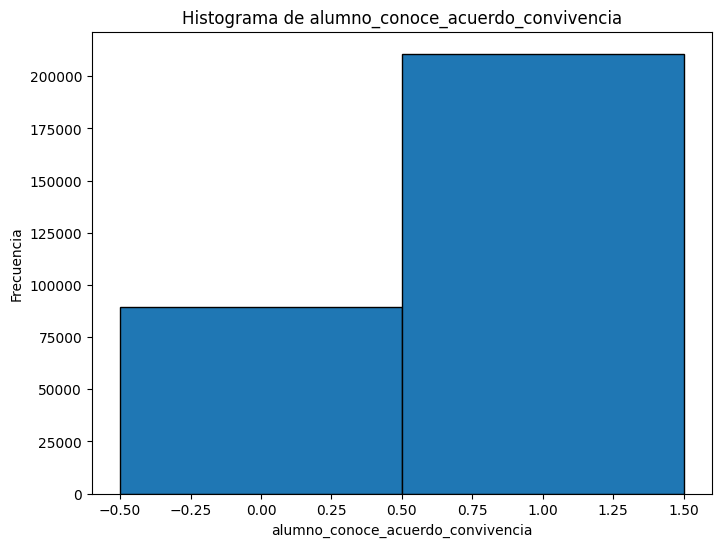

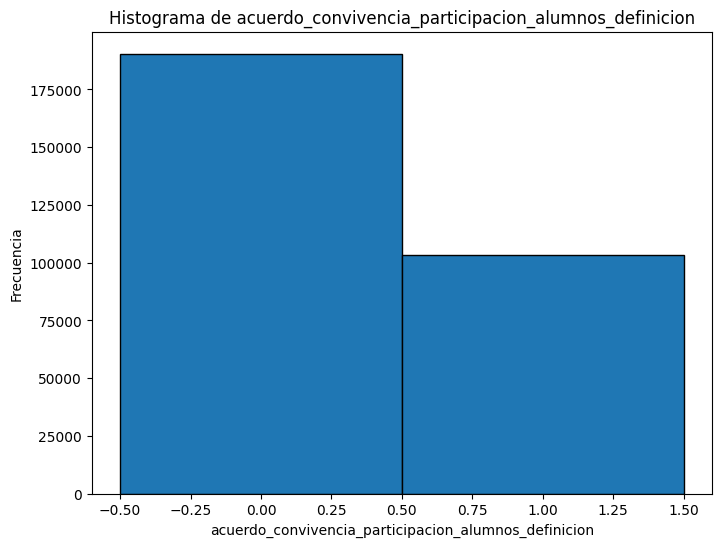

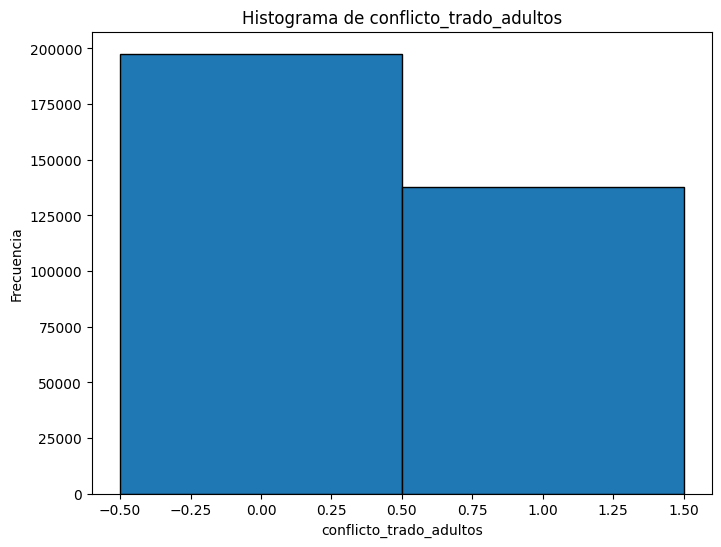

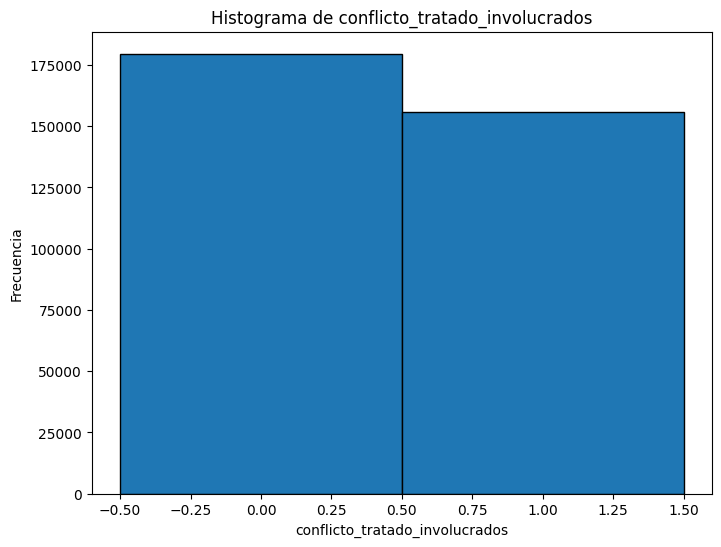

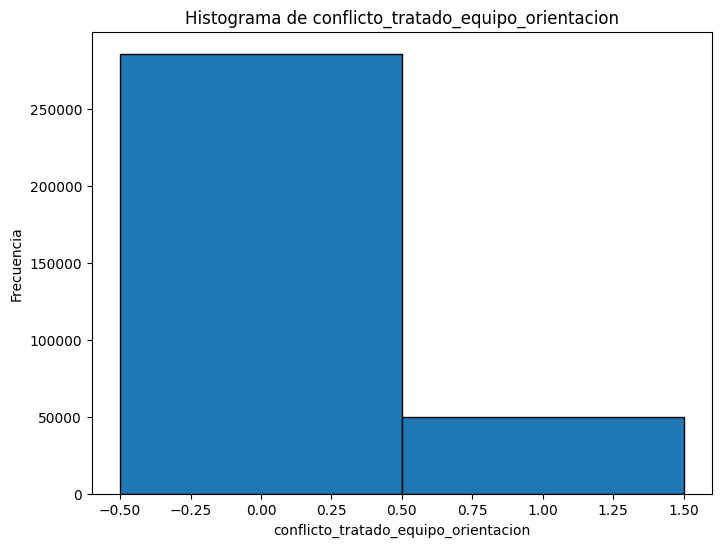

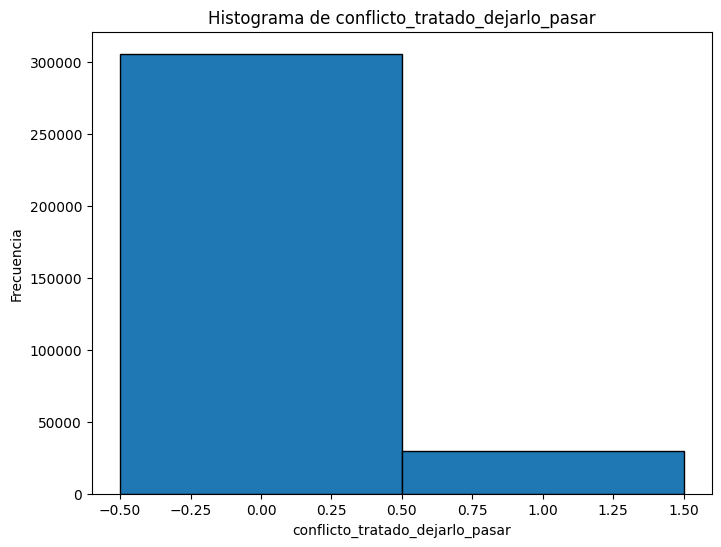

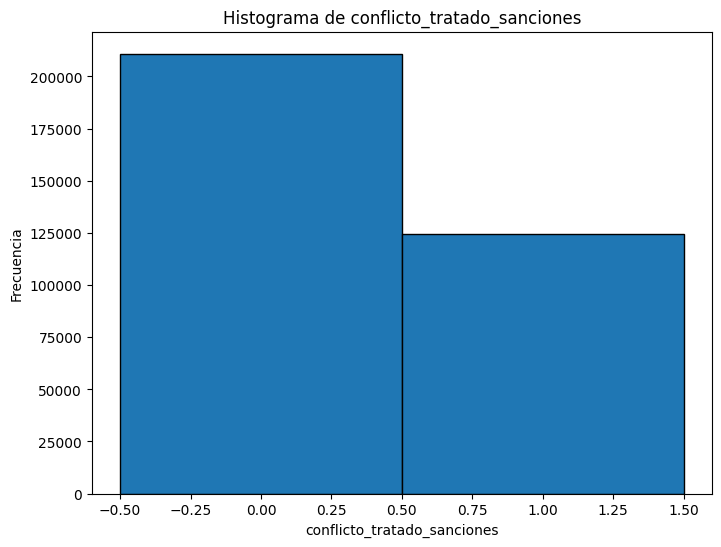

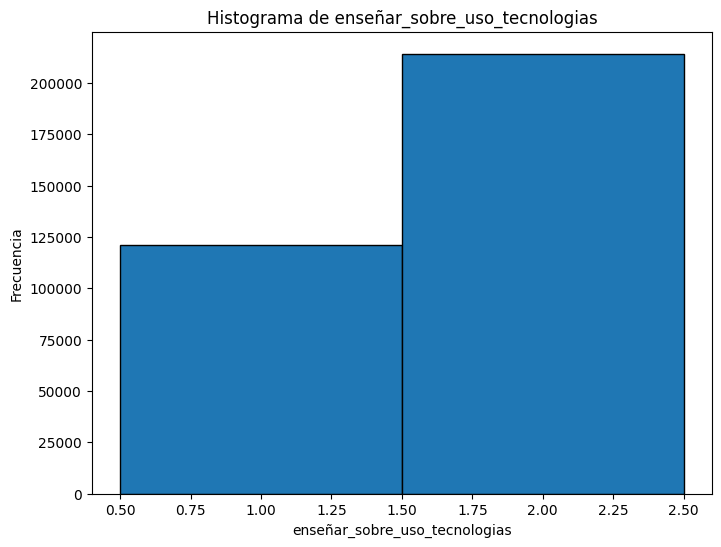

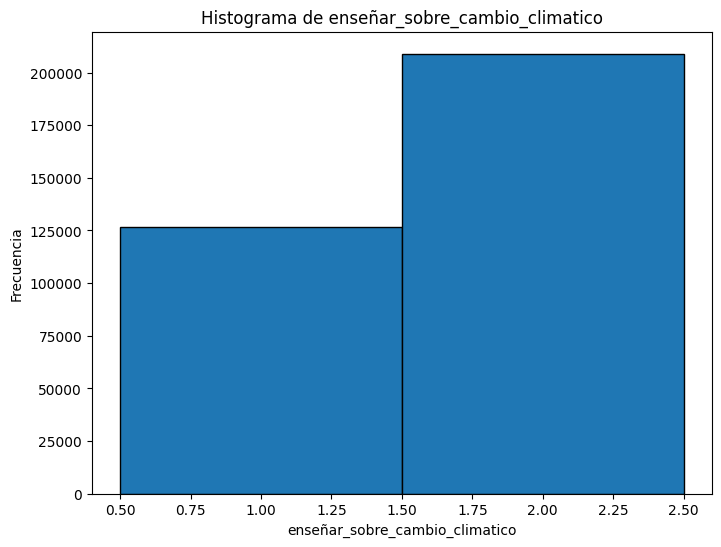

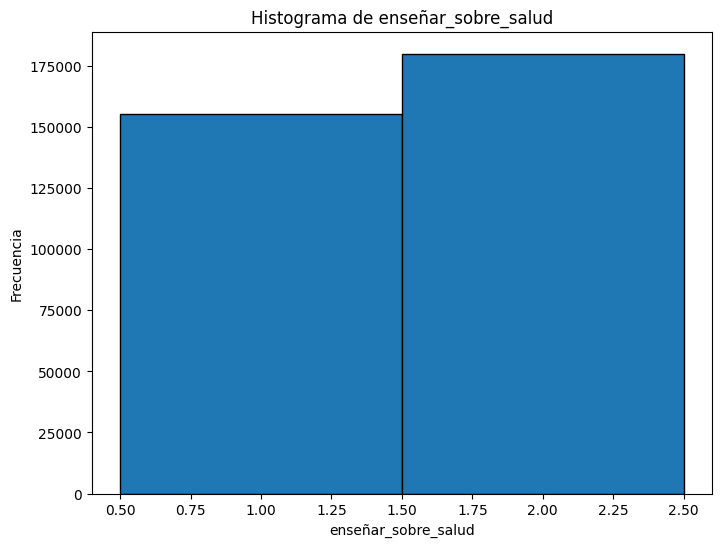

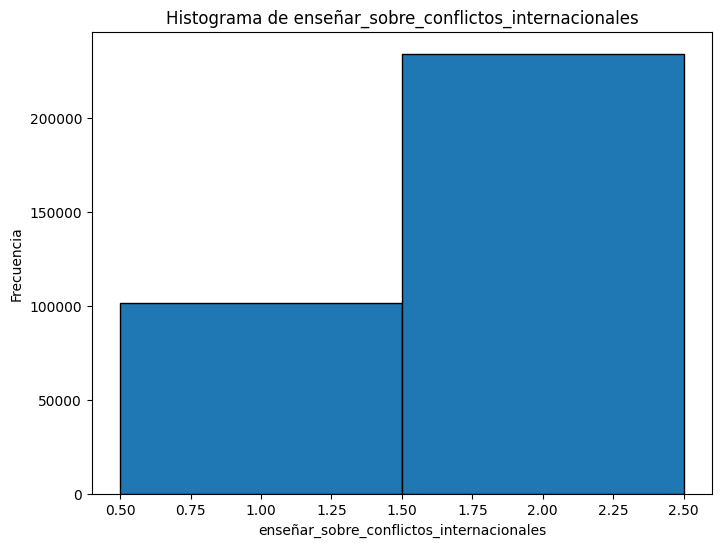

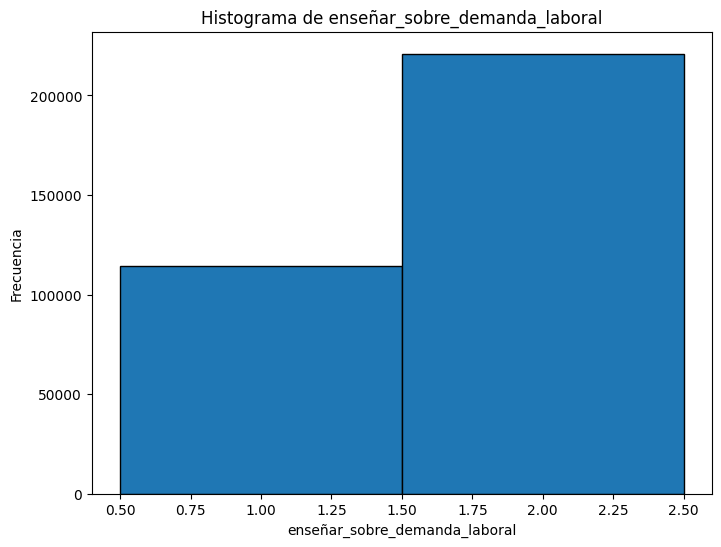

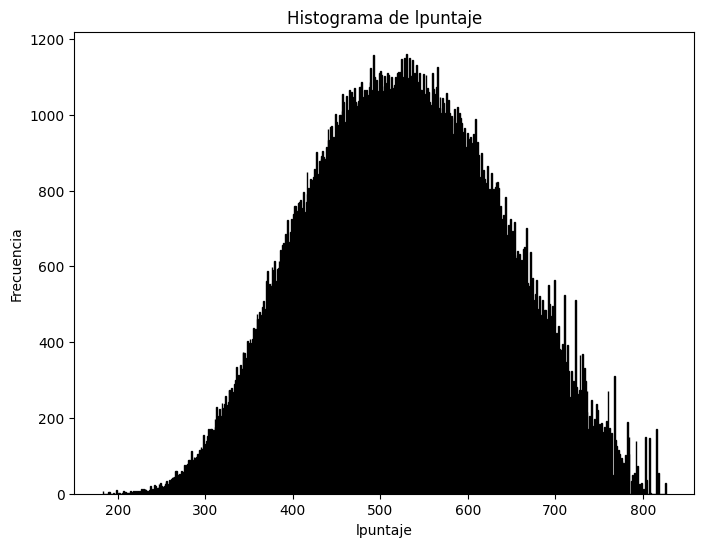

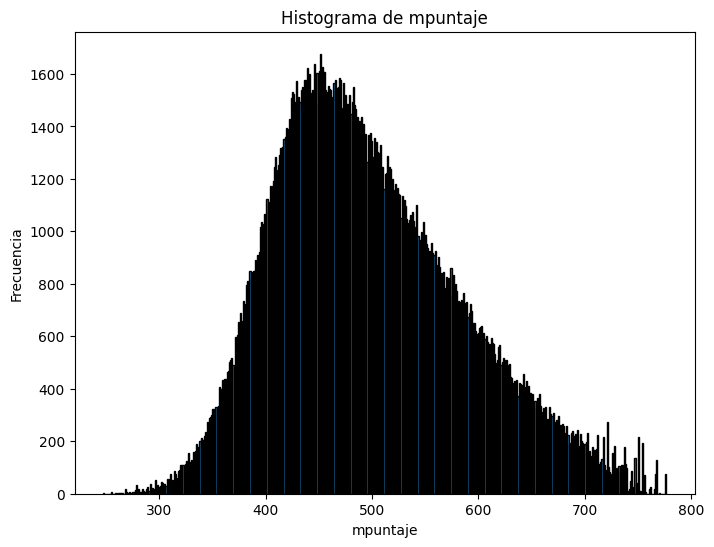

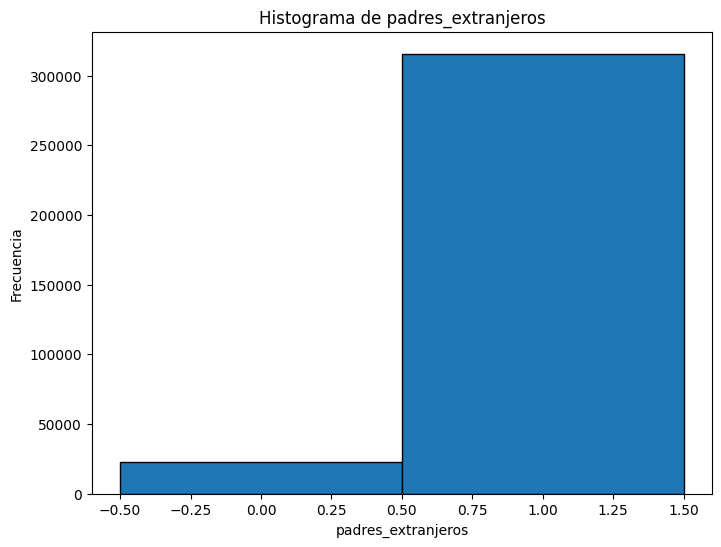

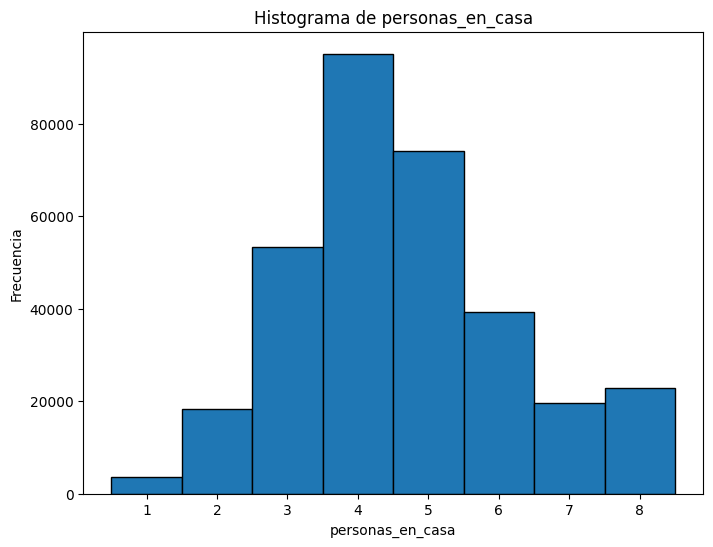

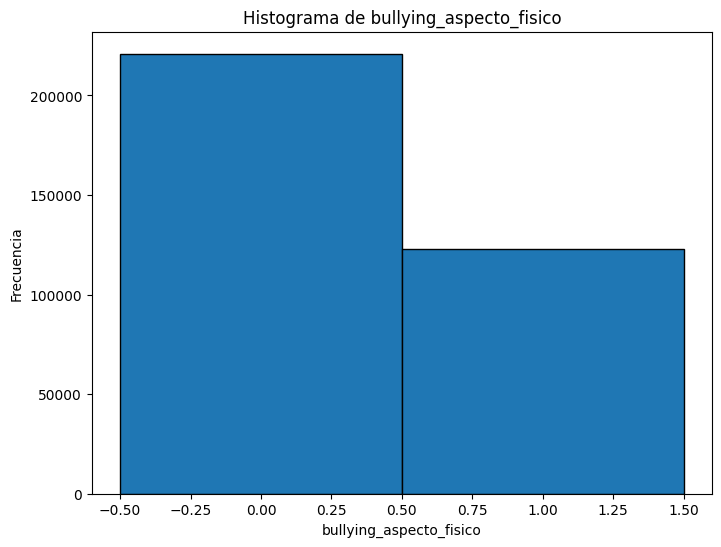

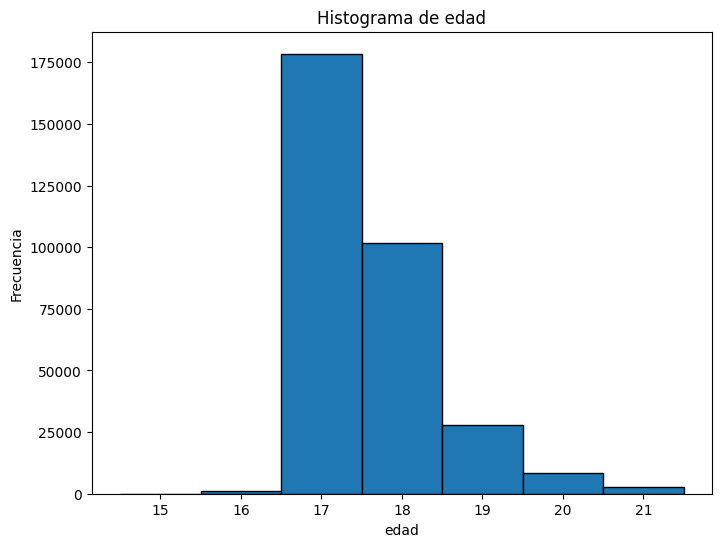

In [ ]:
# prompt: Me podes generar un histograma para cada una de las columnas del dataframe

for column in df_2019.columns:
  try:
    plt.figure(figsize=(8, 6))
    plt.hist(df_2019[column].dropna(), bins=np.arange(df_2019[column].min(), df_2019[column].max() + 1.5) - 0.5, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()
  except:
    print(f"No se puede generar un histograma para la columna {column}")


In [ ]:
# prompt: Necesito contar cuantas filas tienen algun valor nulo. Sin tener en cuaenta la columna seccion y dias_trabajo_fuera_casa y trabaja_remunerado

# Contar filas con al menos un valor nulo, excluyendo las columnas 'seccion', 'dias_trabajo_fuera_casa' y 'trabaja_remunerado'
rows_with_nulls = df_2019.drop(['seccion'], axis=1).isnull().any(axis=1).sum()

print(f"Número de filas con al menos un valor nulo (excluyendo 'seccion'): {rows_with_nulls}")


Número de filas con al menos un valor nulo (excluyendo 'seccion'): 188160


In [ ]:
# Contar la cantidad de valores nulos en cada columna
null_counts = df_2019.isnull().sum()

# Mostrar la cantidad de valores nulos en cada columna
print("Cantidad de valores nulos en cada columna:")
print(null_counts.shape[0])

# Determinar si la cantidad de valores nulos es significativa
total_rows = len(df_2019)
for column, null_count in null_counts.items():
  if null_count > 0:
    percentage_null = (null_count / total_rows) * 100
    if percentage_null > 5:
      print(f"La columna '{column}' tiene una cantidad significativa de valores nulos ({percentage_null:.2f}%).")
    else:
      print(f"La columna '{column}' tiene una cantidad no significativa de valores nulos ({percentage_null:.2f}%).")

Cantidad de valores nulos en cada columna:
70
La columna 'seccion' tiene una cantidad significativa de valores nulos (100.00%).
La columna 'sexo' tiene una cantidad no significativa de valores nulos (4.58%).
La columna 'nacionalidad_alumno' tiene una cantidad no significativa de valores nulos (3.71%).
La columna 'vive_madre' tiene una cantidad no significativa de valores nulos (2.46%).
La columna 'vive_padre' tiene una cantidad no significativa de valores nulos (2.46%).
La columna 'vive_hermano' tiene una cantidad no significativa de valores nulos (2.46%).
La columna 'vive_hijo' tiene una cantidad no significativa de valores nulos (2.46%).
La columna 'vive_tio' tiene una cantidad no significativa de valores nulos (2.46%).
La columna 'vive_abuelo' tiene una cantidad no significativa de valores nulos (2.46%).
La columna 'vive_pareja' tiene una cantidad no significativa de valores nulos (2.46%).
La columna 'vive_amigos' tiene una cantidad no significativa de valores nulos (2.46%).
La colu

In [ ]:
# prompt: generar un archivo csv en base al dataframe generado

# Guardar el DataFrame en un archivo CSV
df_2019.to_csv('Dataset_2019_preprocesado_para_union.csv', index=False)

# Descargar el archivo CSV (opcional)
files.download('Dataset_2019_preprocesado_para_union.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Quiero crear una lista que nombre cada una de las columas del dataframe una encima de la otra y diga cuantas son

column_names = df_2019.columns.tolist()
print("\n".join(column_names))
print(f"Total de columnas: {len(column_names)}")


ID1
cod_provincia
sector
ambito
seccion
idalumno
sexo
nacionalidad_alumno
vive_madre
vive_padre
vive_hermano
vive_hijo
vive_tio
vive_abuelo
vive_pareja
vive_amigos
vive_otro
tiene_hijos
habitaciones_en_casa
tiene_auto
tiene_baño
tiene_computadora
tiene_tablet
tiene_internet
celular_propio
celular_propio_internet
libros_casa
nivel_educativo_madre
nivel_educativo_padre
cuida_familiar
realiza_tareas_hogar
ayuda_trabajo_padres
dias_trabajo_fuera_casa
trabaja_remunerado
fuera_escuela_junto_amigos
fuera_escuela_idioma
fuera_escuela_leer
fuera_escuela_deporte
fuera_escuela_clases_artes
fuera_escuela_television
asistio_jardin
repitio_primaria
repitio_secundaria_1
repitio_secundaria_2
faltas
motivo_faltas_enfermedad
motivo_faltas_ganas
motivo_faltas_ayuda_casa
motivo_faltas_problemas_clima
motivo_faltas_trabajo
motivo_faltas_otros
hay_acuerdo_convivencia
alumno_conoce_acuerdo_convivencia
acuerdo_convivencia_participacion_alumnos_definicion
conflicto_trado_adultos
conflicto_tratado_involucrados
